In [101]:
# !pip install seaborn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
def create_summary_dataframe(summary_df):
    rmse_columns = [col for col in summary_df.columns if col.startswith('rmse_')]
    summary_df['best_rmse'] = summary_df[rmse_columns].idxmin(axis=1)
    return summary_df

# Comparing with benchmark

In [3]:
# 0,19 seg
mean_0 = pd.read_csv('/Users/santiagoromano/Documents/code/MasterThesis/results/metrics_cluster_0_mean.csv')
mean_0 = mean_0[['pdv_codigo', 'codigo_barras_sku', 'mse_cant_vta_pred_mean_pdv_sku',
       'rmse_cant_vta_pred_mean_pdv_sku']]
print(mean_0['codigo_barras_sku'].nunique(), mean_0.shape, mean_0[['codigo_barras_sku','pdv_codigo']].drop_duplicates().shape)
# 0,34 seg
mean_1 = pd.read_csv('/Users/santiagoromano/Documents/code/MasterThesis/results/metrics_cluster_1_mean.csv')
mean_1 = mean_1[['pdv_codigo', 'codigo_barras_sku', 'mse_cant_vta_pred_mean_pdv_sku',
       'rmse_cant_vta_pred_mean_pdv_sku']]
print(mean_1['codigo_barras_sku'].nunique(), mean_1.shape, mean_1[['codigo_barras_sku','pdv_codigo']].drop_duplicates().shape)
# 0,23 seg
mean_2 = pd.read_csv('/Users/santiagoromano/Documents/code/MasterThesis/results/metrics_cluster_2_mean.csv')
mean_2 = mean_2[['pdv_codigo', 'codigo_barras_sku', 'mse_cant_vta_pred_mean_pdv_sku',
       'rmse_cant_vta_pred_mean_pdv_sku']]
print(mean_2['codigo_barras_sku'].nunique(), mean_2.shape, mean_2[['codigo_barras_sku','pdv_codigo']].drop_duplicates().shape)

10 (219, 4) (219, 2)
10 (198, 4) (198, 2)
10 (223, 4) (223, 2)


In [44]:
print(mean_0['rmse_cant_vta_pred_mean_pdv_sku'].median(),mean_0['rmse_cant_vta_pred_mean_pdv_sku'].mean())
print(mean_1['rmse_cant_vta_pred_mean_pdv_sku'].median(),mean_1['rmse_cant_vta_pred_mean_pdv_sku'].mean())
print(mean_2['rmse_cant_vta_pred_mean_pdv_sku'].median(),mean_2['rmse_cant_vta_pred_mean_pdv_sku'].mean())

6626.7 9245.24794520548
38956.85 147077.27979797978
19162.7 30806.54484304933


## SFF

In [5]:
# SFF
# 3711 seg
sff_0 = pd.read_csv('/Users/santiagoromano/Documents/code/MasterThesis/results/metrics_cluster_0_sff.csv')
sff_0 = sff_0[['pdv_codigo', 'codigo_barras_sku',
       'rmse_cant_vta_pred_sff_mean']]
print(sff_0['codigo_barras_sku'].nunique(), sff_0.shape, sff_0[['codigo_barras_sku','pdv_codigo']].drop_duplicates().shape)

# 3413 seg
sff_1 = pd.read_csv('/Users/santiagoromano/Documents/code/MasterThesis/results/metrics_cluster_1_sff.csv')
sff_1 = sff_1[['pdv_codigo', 'codigo_barras_sku',
       'rmse_cant_vta_pred_sff_mean']]
print(sff_1['codigo_barras_sku'].nunique(), sff_1.shape, sff_1[['codigo_barras_sku','pdv_codigo']].drop_duplicates().shape)

# 4168 seg
sff_2 = pd.read_csv('/Users/santiagoromano/Documents/code/MasterThesis/results/metrics_cluster_2_sff.csv')
sff_2 = sff_2[['pdv_codigo', 'codigo_barras_sku',
       'rmse_cant_vta_pred_sff_mean']]
print(sff_2['codigo_barras_sku'].nunique(), sff_2.shape, sff_2[['codigo_barras_sku','pdv_codigo']].drop_duplicates().shape)

10 (219, 3) (219, 2)
10 (198, 3) (198, 2)
10 (223, 3) (223, 2)


In [6]:
print(sff_0['rmse_cant_vta_pred_sff_mean'].median(),sff_0['rmse_cant_vta_pred_sff_mean'].mean())
print(sff_1['rmse_cant_vta_pred_sff_mean'].median(),sff_1['rmse_cant_vta_pred_sff_mean'].mean())
print(sff_2['rmse_cant_vta_pred_sff_mean'].median(),sff_2['rmse_cant_vta_pred_sff_mean'].mean())

6238.2 9040.067123287672
30709.45 137024.09797979798
15902.0 27637.335874439465


best_rmse
rmse_cant_vta_pred_sff_mean        123
rmse_cant_vta_pred_mean_pdv_sku     96
Name: count, dtype: int64
best_rmse
rmse_cant_vta_pred_sff_mean        176
rmse_cant_vta_pred_mean_pdv_sku     22
Name: count, dtype: int64
best_rmse
rmse_cant_vta_pred_sff_mean        190
rmse_cant_vta_pred_mean_pdv_sku     33
Name: count, dtype: int64


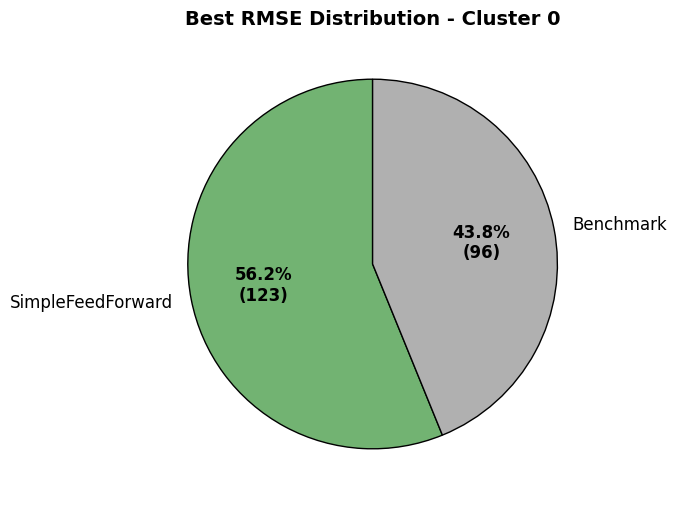

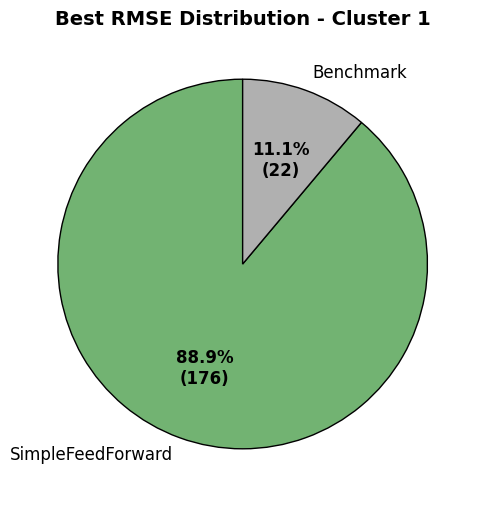

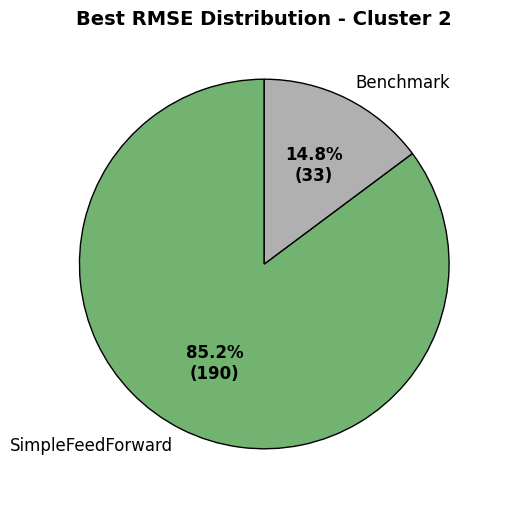

In [7]:
#a)
test_0 = sff_0.merge(mean_0, on=['pdv_codigo', 'codigo_barras_sku'], how='inner')
summary_0 = create_summary_dataframe(test_0)
print(summary_0['best_rmse'].value_counts())

test_1 = sff_1.merge(mean_1, on=['pdv_codigo', 'codigo_barras_sku'], how='inner')
summary_1 = create_summary_dataframe(test_1)
print(summary_1['best_rmse'].value_counts())

test_2 = sff_2.merge(mean_2, on=['pdv_codigo', 'codigo_barras_sku'], how='inner')
summary_2 = create_summary_dataframe(test_2)
print(summary_2['best_rmse'].value_counts())

# Define professional-looking colors
color_mapping = {
    "rmse_cant_vta_pred_mean_pdv_sku": "#B0B0B0",  # Light Grey for Benchmark
    "rmse_cant_vta_pred_sff_mean": "#72B372"      # Soft Green for SimpleFeedForward
}
label_mapping = {
    "rmse_cant_vta_pred_mean_pdv_sku": "Benchmark",
    "rmse_cant_vta_pred_sff_mean": "SimpleFeedForward"
}

# List of summaries and titles
summaries = [summary_0, summary_1, summary_2]
titles = ["Cluster 0", "Cluster 1", "Cluster 2"]
# Generate separate pie charts with the same size
for summary, title in zip(summaries, titles):
    fig, ax = plt.subplots(figsize=(6, 6))  # Ensure same size for all figures
    
    # Count values for 'best_rmse' and rename labels
    value_counts = summary['best_rmse'].value_counts()
    labels = [label_mapping[label] for label in value_counts.index]  # Map to new labels
    colors = [color_mapping[label] for label in value_counts.index]  # Map to colors
    
    # Define custom function to show percentage on top and count below
    def make_autopct(values):
        def autopct(pct):
            total = sum(values)
            count = int(round(pct * total / 100.0))
            return f'{pct:.1f}%\n({count})'  # Line break between % and count
        return autopct

    
    # Create the pie chart
    wedges, texts, autotexts = ax.pie(
        value_counts, labels=labels, 
        autopct=make_autopct(value_counts),  # Show % and count
        startangle=90, colors=colors,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1},  # Adds border for clarity
        textprops={'fontsize': 12, 'color': 'black'}  # Improve text readability
    )
    
    # Make percentage labels bold
    for autotext in autotexts:
        autotext.set_fontweight("bold")
    
    # Add title with better formatting
    ax.set_title(f"Best RMSE Distribution - {title}", fontsize=14, fontweight="bold")
    
    # Show the plot
    plt.show()


In [8]:
#   b)
test_0['mejora_%'] =  round(((test_0['rmse_cant_vta_pred_mean_pdv_sku'] - test_0['rmse_cant_vta_pred_sff_mean']) / test_0['rmse_cant_vta_pred_mean_pdv_sku'])*100,3)
# print(test_0['mejora_%'].describe())

test_1['mejora_%'] =  round(((test_1['rmse_cant_vta_pred_mean_pdv_sku'] - test_1['rmse_cant_vta_pred_sff_mean']) / test_1['rmse_cant_vta_pred_mean_pdv_sku'])*100,3)
# print(test_1['mejora_%'].describe())

test_2['mejora_%'] =  round(((test_2['rmse_cant_vta_pred_mean_pdv_sku'] - test_2['rmse_cant_vta_pred_sff_mean']) / test_2['rmse_cant_vta_pred_mean_pdv_sku'])*100,3)
# print(test_2['mejora_%'].describe())


# 2. Estadísticos
print(f"cluster 0: sff gana en {(test_0['mejora_%'] > 0).mean():.1%} de casos")
print(f"Mediana de la mejora: {test_0[test_0['mejora_%'] > 0]['mejora_%'].median():.1f}%")

print(f"cluster 1: sff gana en {(test_1['mejora_%'] > 0).mean():.1%} de casos")
print(f"Mediana de la mejora: {test_1[test_1['mejora_%'] > 0]['mejora_%'].median():.1f}%")

print(f"cluster 2: sff gana en {(test_2['mejora_%'] > 0).mean():.1%} de casos")
print(f"Mediana de la mejora: {test_2[test_2['mejora_%'] > 0]['mejora_%'].median():.1f}%")


cluster 0: sff gana en 56.2% de casos
Mediana de la mejora: 7.0%
cluster 1: sff gana en 88.9% de casos
Mediana de la mejora: 17.3%
cluster 2: sff gana en 85.2% de casos
Mediana de la mejora: 12.7%


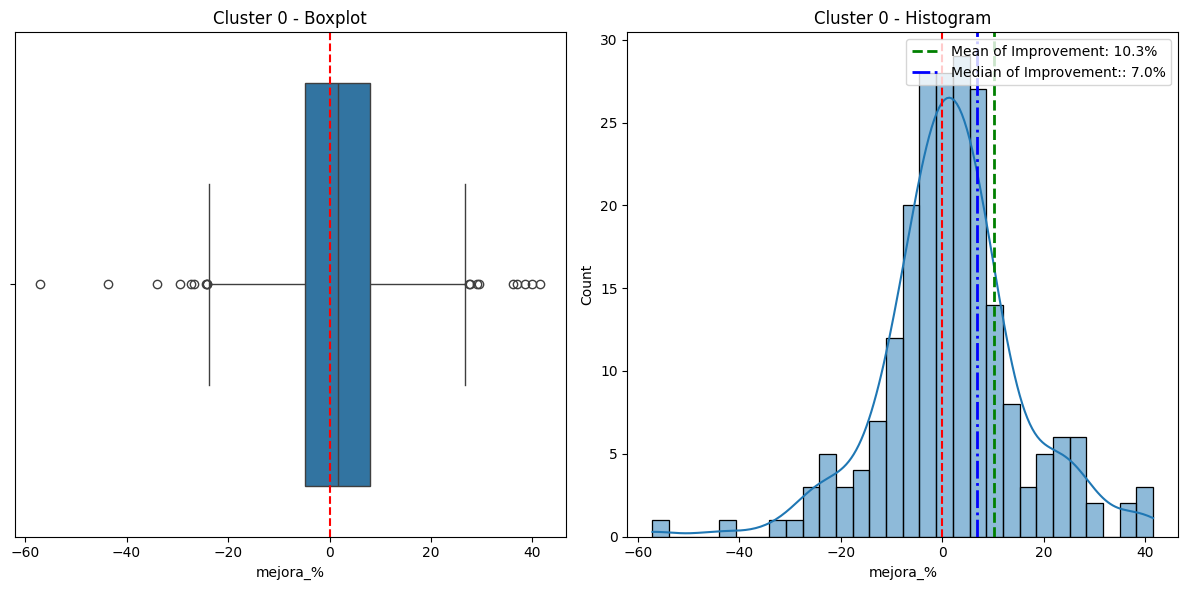

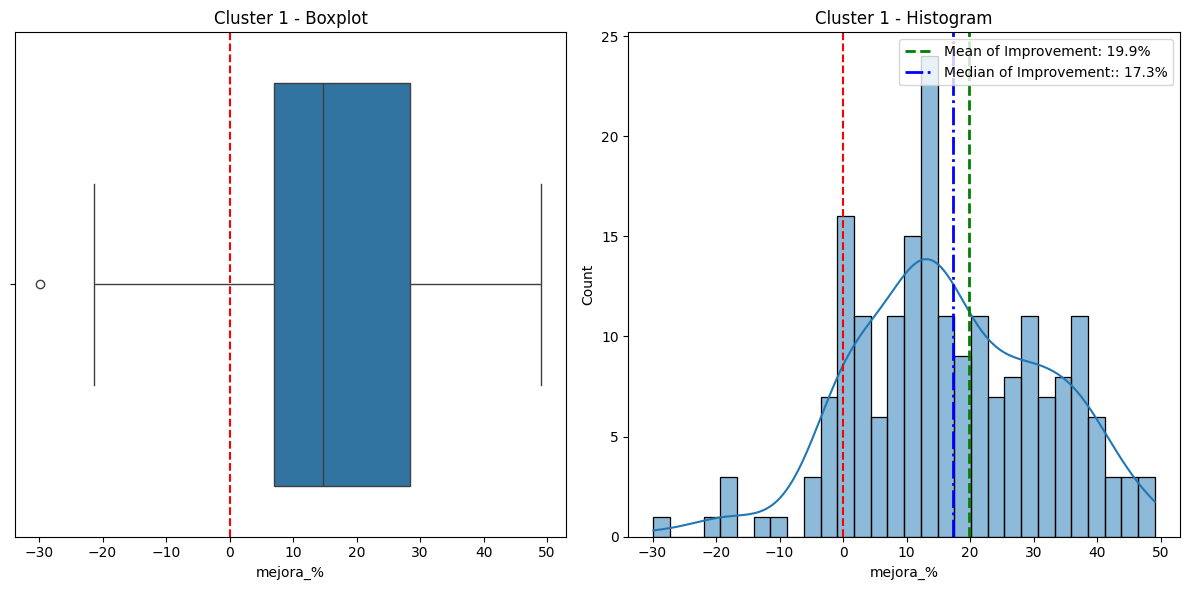

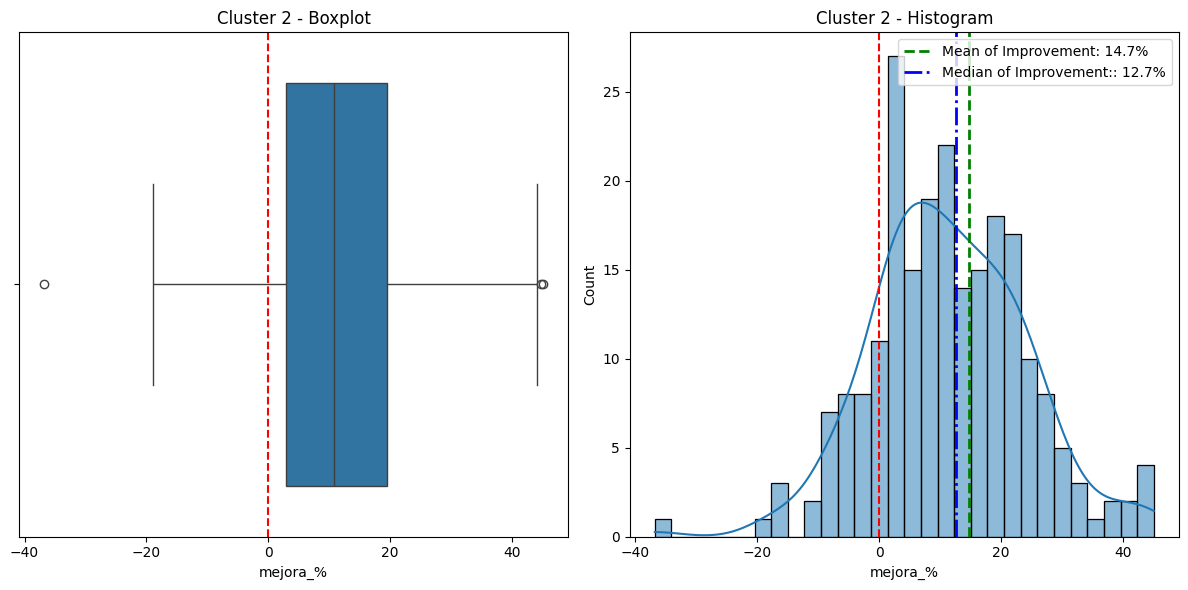

In [12]:
# List of datasets and titles
datasets = [test_0, test_1, test_2]
titles = ["Cluster 0", "Cluster 1", "Cluster 2"]

for data, title in zip(datasets, titles):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Boxplot
    sns.boxplot(data=data, x='mejora_%', ax=axes[0])
    axes[0].axvline(0, color='red', linestyle='--')
    axes[0].set_title(f"{title} - Boxplot")

    # Histogram
    sns.histplot(data['mejora_%'], bins=30, kde=True, ax=axes[1])
    axes[1].axvline(0, color='red', linestyle='--')

    # Calculate mean and median (only positive improvements if needed)
    positive_improvements = data[data['mejora_%'] > 0]['mejora_%']
    mean_value = positive_improvements.mean()
    median_value = positive_improvements.median()

    # Add vertical lines for mean and median
    axes[1].axvline(mean_value, color='green', linestyle='--', linewidth=2, label=f'Mean of Improvement: {mean_value:.1f}%')
    axes[1].axvline(median_value, color='blue', linestyle='-.', linewidth=2, label=f'Median of Improvement:: {median_value:.1f}%')

    # Add legend
    axes[1].legend(loc='upper right', fontsize=10)

    axes[1].set_title(f"{title} - Histogram")

    plt.tight_layout()
    plt.show()


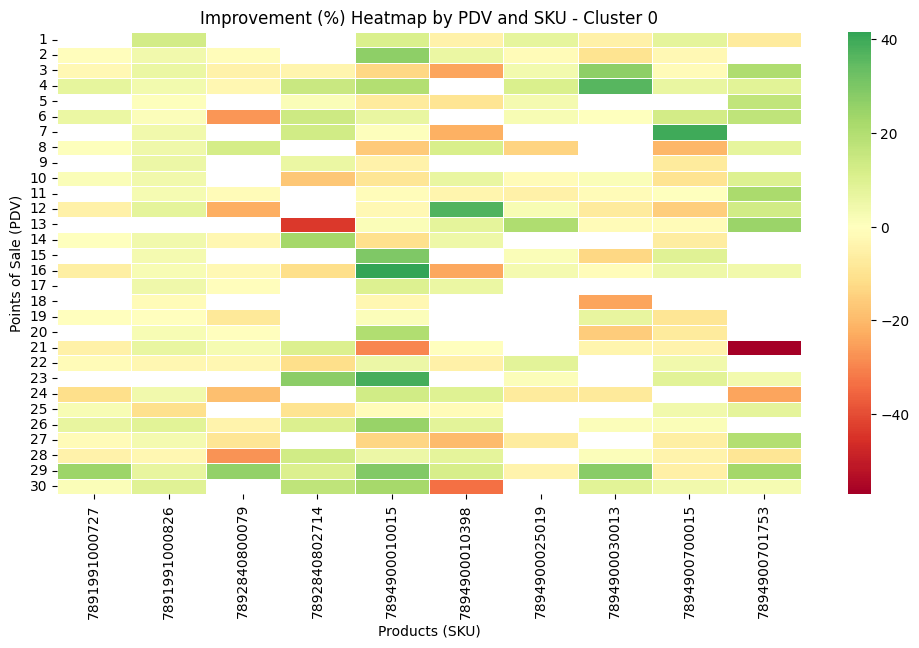

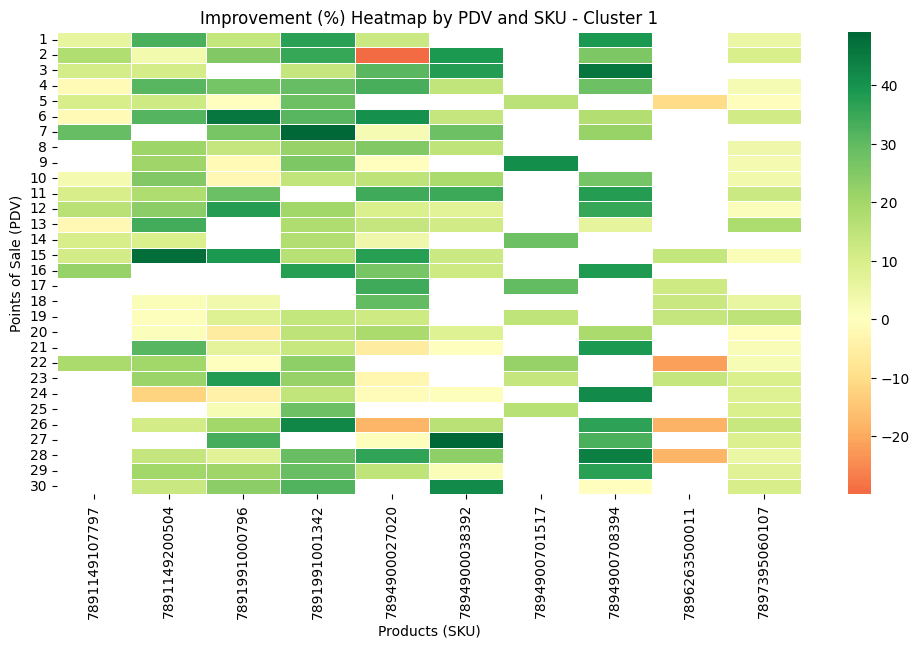

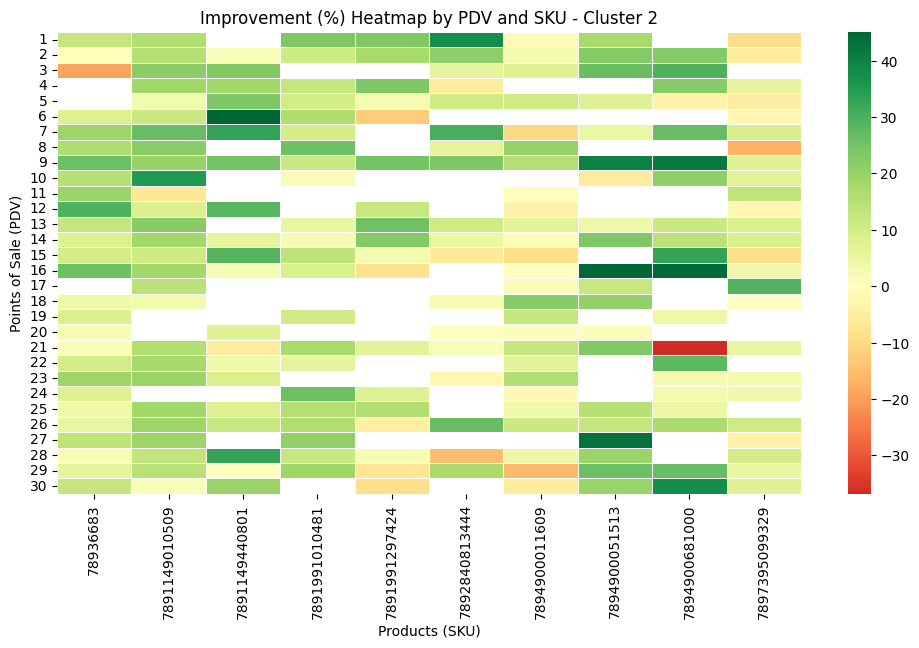

In [10]:
# List of datasets and titles
datasets = [test_0, test_1, test_2]
titles = ["Cluster 0", "Cluster 1", "Cluster 2"]

# Loop through datasets and create separate plots
for data, title in zip(datasets, titles):
    plt.figure(figsize=(12, 6))  # Create a new figure for each heatmap
    pivot_data = data.pivot_table(index='pdv_codigo', columns='codigo_barras_sku', values='mejora_%')

    sns.heatmap(pivot_data, cmap="RdYlGn", center=0, annot=False, linewidths=0.5)
    
    plt.title(f"Improvement (%) Heatmap by PDV and SKU - {title}")
    plt.xlabel("Products (SKU)")
    plt.ylabel("Points of Sale (PDV)")
    
    plt.show()  # Show each heatmap separately


# DeepAR

In [35]:
#  16095 seg
deepar_0 = pd.read_csv('/Users/santiagoromano/Documents/code/MasterThesis/results/metrics_cluster_0_deepar.csv')
print(deepar_0['codigo_barras_sku'].nunique(), deepar_0.shape, deepar_0[['codigo_barras_sku','pdv_codigo']].drop_duplicates().shape)
deepar_0['rmse_cant_vta_pred_deepar'] = np.where(
    deepar_0['rmse_cant_vta_pred_deepar_mean'] < deepar_0['rmse_cant_vta_pred_deepar_median'],
    deepar_0['rmse_cant_vta_pred_deepar_mean'],
    deepar_0['rmse_cant_vta_pred_deepar_median']
)
deepar_0 = deepar_0[['pdv_codigo', 'codigo_barras_sku', 
                     'rmse_cant_vta_pred_deepar']]

# 16436 seg
deepar_1 = pd.read_csv('/Users/santiagoromano/Documents/code/MasterThesis/results/metrics_cluster_1_deepar.csv')
print(deepar_1['codigo_barras_sku'].nunique(), deepar_1.shape, deepar_1[['codigo_barras_sku','pdv_codigo']].drop_duplicates().shape)
deepar_1['rmse_cant_vta_pred_deepar'] = np.where(
    deepar_1['rmse_cant_vta_pred_deepar_mean'] < deepar_1['rmse_cant_vta_pred_deepar_median'],
    deepar_1['rmse_cant_vta_pred_deepar_mean'],
    deepar_1['rmse_cant_vta_pred_deepar_median']
)
deepar_1 = deepar_1[['pdv_codigo', 'codigo_barras_sku', 
                     'rmse_cant_vta_pred_deepar']]


# 2987   seg , not representative 
deepar_2 = pd.read_csv('/Users/santiagoromano/Documents/code/MasterThesis/results/metrics_cluster_2_deepar.csv')
print(deepar_2['codigo_barras_sku'].nunique(), deepar_2.shape, deepar_2[['codigo_barras_sku','pdv_codigo']].drop_duplicates().shape)
deepar_2['rmse_cant_vta_pred_deepar'] = np.where(
    deepar_2['rmse_cant_vta_pred_deepar_mean'] < deepar_2['rmse_cant_vta_pred_deepar_median'],
    deepar_2['rmse_cant_vta_pred_deepar_mean'],
    deepar_2['rmse_cant_vta_pred_deepar_median']
)
deepar_2 = deepar_2[['pdv_codigo', 'codigo_barras_sku',
                        'rmse_cant_vta_pred_deepar']]


10 (219, 8) (219, 2)
10 (198, 8) (198, 2)
10 (223, 8) (223, 2)


In [36]:
print(deepar_0['rmse_cant_vta_pred_deepar'].median(),deepar_0['rmse_cant_vta_pred_deepar'].mean())
print(deepar_1['rmse_cant_vta_pred_deepar'].median(),deepar_1['rmse_cant_vta_pred_deepar'].mean())
print(deepar_2['rmse_cant_vta_pred_deepar'].median(),deepar_2['rmse_cant_vta_pred_deepar'].mean())


6574.2 9280.50319634703
38336.149999999994 145516.20707070708
17867.1 29292.658295964124


best_rmse
rmse_cant_vta_pred_mean_pdv_sku    110
rmse_cant_vta_pred_deepar          109
Name: count, dtype: int64
best_rmse
rmse_cant_vta_pred_deepar          138
rmse_cant_vta_pred_mean_pdv_sku     60
Name: count, dtype: int64
best_rmse
rmse_cant_vta_pred_deepar          163
rmse_cant_vta_pred_mean_pdv_sku     60
Name: count, dtype: int64


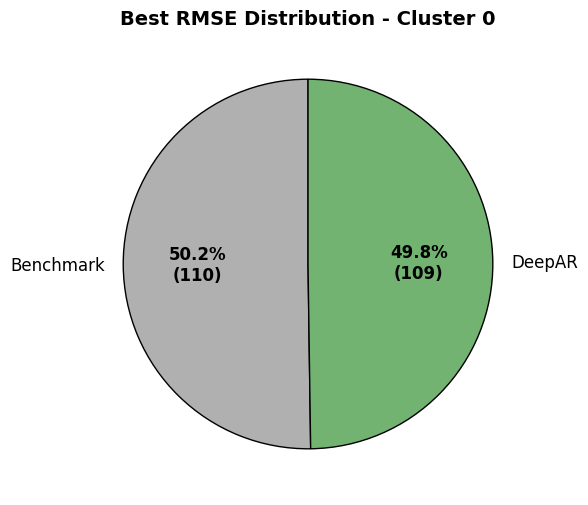

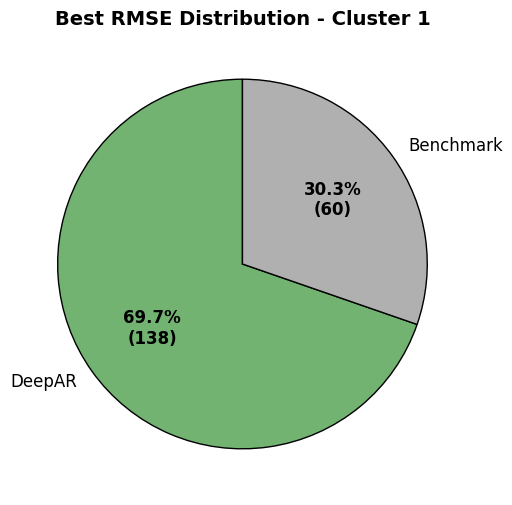

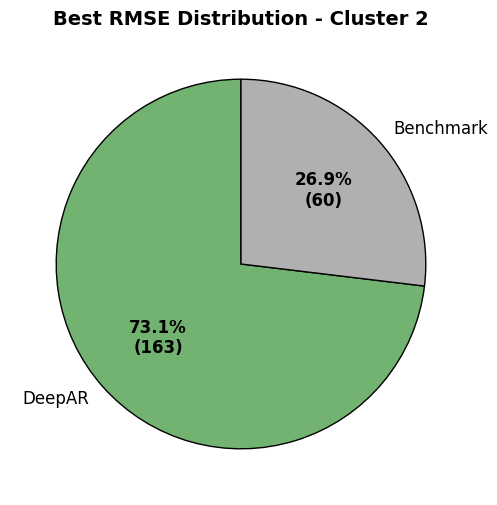

In [37]:
#a)
test_0 = deepar_0.merge(mean_0, on=['pdv_codigo', 'codigo_barras_sku'], how='inner')
summary_0 = create_summary_dataframe(test_0)
print(summary_0['best_rmse'].value_counts())

test_1 = deepar_1.merge(mean_1, on=['pdv_codigo', 'codigo_barras_sku'], how='inner')
summary_1 = create_summary_dataframe(test_1)
print(summary_1['best_rmse'].value_counts())

test_2 = deepar_2.merge(mean_2, on=['pdv_codigo', 'codigo_barras_sku'], how='inner')
summary_2 = create_summary_dataframe(test_2)
print(summary_2['best_rmse'].value_counts())

# Define professional-looking colors
color_mapping = {
    "rmse_cant_vta_pred_mean_pdv_sku": "#B0B0B0",  # Light Grey for Benchmark
    "rmse_cant_vta_pred_deepar": "#72B372"      # Soft Green for SimpleFeedForward
}
label_mapping = {
    "rmse_cant_vta_pred_mean_pdv_sku": "Benchmark",
    "rmse_cant_vta_pred_deepar": "DeepAR"
}

# List of summaries and titles
summaries = [summary_0, summary_1, summary_2]
titles = ["Cluster 0", "Cluster 1", "Cluster 2"]
# Generate separate pie charts with the same size
for summary, title in zip(summaries, titles):
    fig, ax = plt.subplots(figsize=(6, 6))  # Ensure same size for all figures
    
    # Count values for 'best_rmse' and rename labels
    value_counts = summary['best_rmse'].value_counts()
    labels = [label_mapping[label] for label in value_counts.index]  # Map to new labels
    colors = [color_mapping[label] for label in value_counts.index]  # Map to colors
    
    # Define custom function to show percentage on top and count below
    def make_autopct(values):
        def autopct(pct):
            total = sum(values)
            count = int(round(pct * total / 100.0))
            return f'{pct:.1f}%\n({count})'  # Line break between % and count
        return autopct

    
    # Create the pie chart
    wedges, texts, autotexts = ax.pie(
        value_counts, labels=labels, 
        autopct=make_autopct(value_counts),  # Show % and count
        startangle=90, colors=colors,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1},  # Adds border for clarity
        textprops={'fontsize': 12, 'color': 'black'}  # Improve text readability
    )
    
    # Make percentage labels bold
    for autotext in autotexts:
        autotext.set_fontweight("bold")
    
    # Add title with better formatting
    ax.set_title(f"Best RMSE Distribution - {title}", fontsize=14, fontweight="bold")
    
    # Show the plot
    plt.show()

In [38]:
#   b)
test_0['mejora_%'] =  round(((test_0['rmse_cant_vta_pred_mean_pdv_sku'] - test_0['rmse_cant_vta_pred_deepar']) / test_0['rmse_cant_vta_pred_mean_pdv_sku'])*100,3)
# print(test_0['mejora_%'].describe())

test_1['mejora_%'] =  round(((test_1['rmse_cant_vta_pred_mean_pdv_sku'] - test_1['rmse_cant_vta_pred_deepar']) / test_1['rmse_cant_vta_pred_mean_pdv_sku'])*100,3)
# print(test_1['mejora_%'].describe())

test_2['mejora_%'] =  round(((test_2['rmse_cant_vta_pred_mean_pdv_sku'] - test_2['rmse_cant_vta_pred_deepar']) / test_2['rmse_cant_vta_pred_mean_pdv_sku'])*100,3)
# print(test_2['mejora_%'].describe())


# 2. Estadísticos
print(f"cluster 0: deepar gana en {(test_0['mejora_%'] > 0).mean():.1%} de casos")
print(f"Mediana de la mejora: {test_0[test_0['mejora_%'] > 0]['mejora_%'].median():.1f}%")

print(f"cluster 1: deepar gana en {(test_1['mejora_%'] > 0).mean():.1%} de casos")
print(f"Mediana de la mejora: {test_1[test_1['mejora_%'] > 0]['mejora_%'].median():.1f}%")

print(f"cluster 2: deepar gana en {(test_2['mejora_%'] > 0).mean():.1%} de casos")
print(f"Mediana de la mejora: {test_2[test_2['mejora_%'] > 0]['mejora_%'].median():.1f}%")

cluster 0: deepar gana en 49.8% de casos
Mediana de la mejora: 5.8%
cluster 1: deepar gana en 69.7% de casos
Mediana de la mejora: 18.3%
cluster 2: deepar gana en 73.1% de casos
Mediana de la mejora: 12.0%


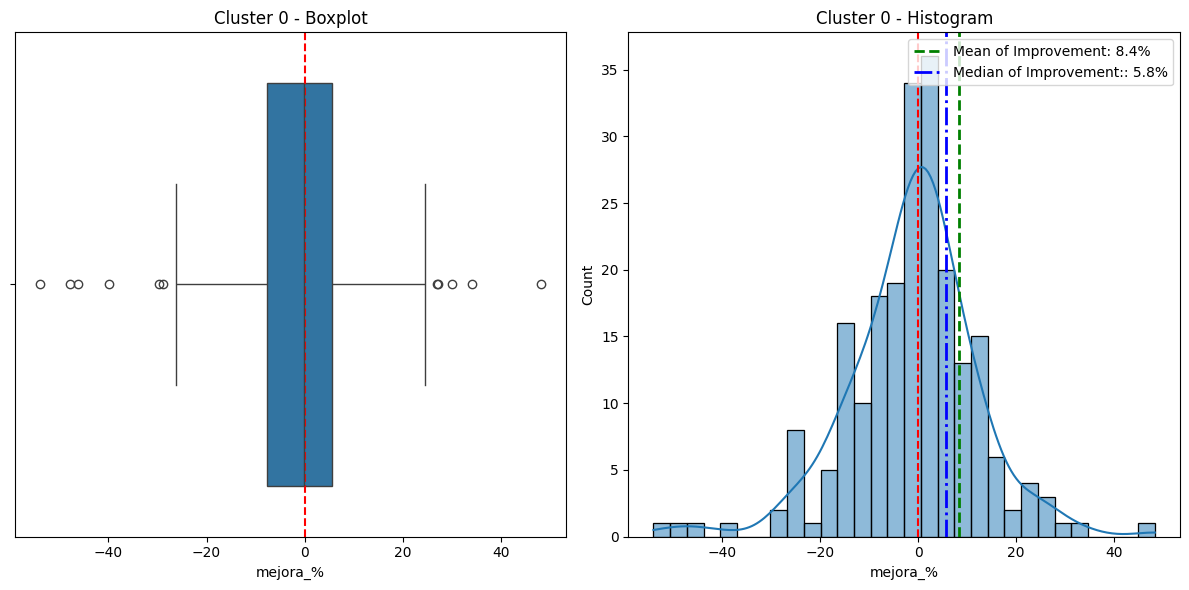

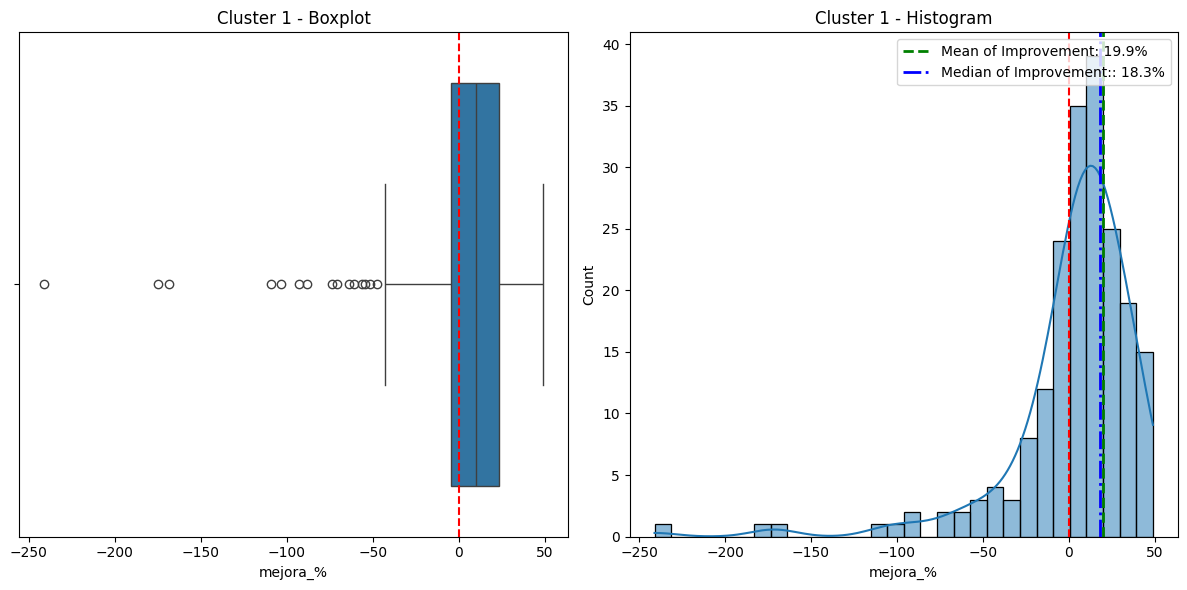

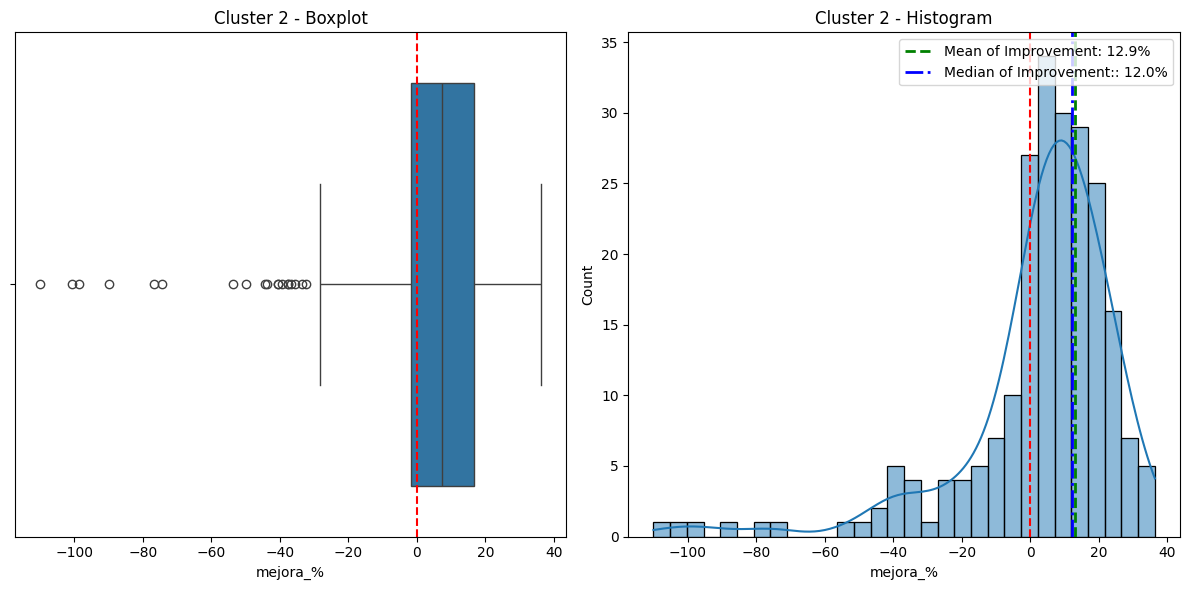

In [39]:
# List of datasets and titles
datasets = [test_0, test_1, test_2]
titles = ["Cluster 0", "Cluster 1", "Cluster 2"]

for data, title in zip(datasets, titles):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Boxplot
    sns.boxplot(data=data, x='mejora_%', ax=axes[0])
    axes[0].axvline(0, color='red', linestyle='--')
    axes[0].set_title(f"{title} - Boxplot")

    # Histogram
    sns.histplot(data['mejora_%'], bins=30, kde=True, ax=axes[1])
    axes[1].axvline(0, color='red', linestyle='--')

    # Calculate mean and median (only positive improvements if needed)
    positive_improvements = data[data['mejora_%'] > 0]['mejora_%']
    mean_value = positive_improvements.mean()
    median_value = positive_improvements.median()

    # Add vertical lines for mean and median
    axes[1].axvline(mean_value, color='green', linestyle='--', linewidth=2, label=f'Mean of Improvement: {mean_value:.1f}%')
    axes[1].axvline(median_value, color='blue', linestyle='-.', linewidth=2, label=f'Median of Improvement:: {median_value:.1f}%')

    # Add legend
    axes[1].legend(loc='upper right', fontsize=10)

    axes[1].set_title(f"{title} - Histogram")

    plt.tight_layout()
    plt.show()

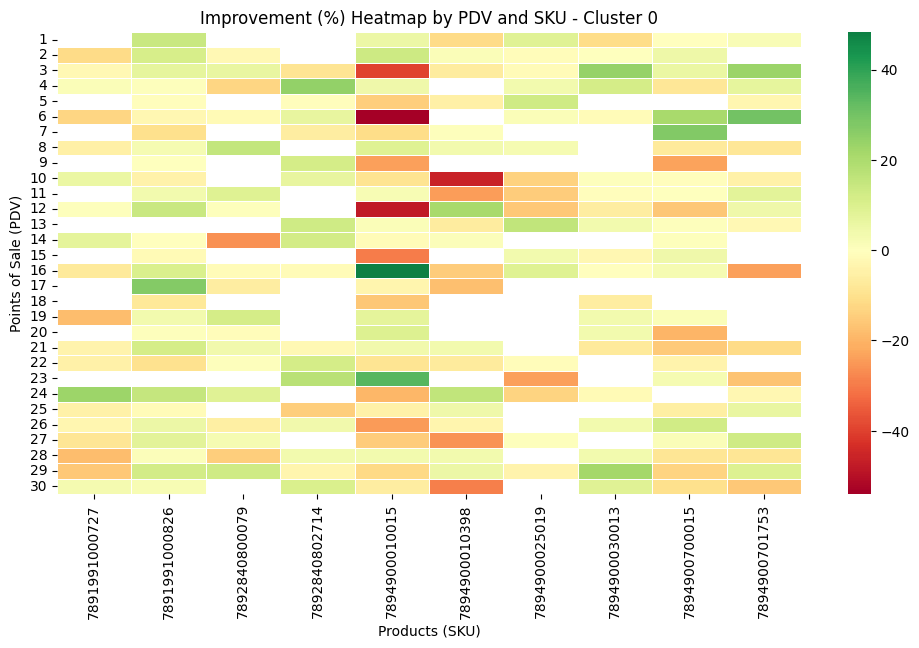

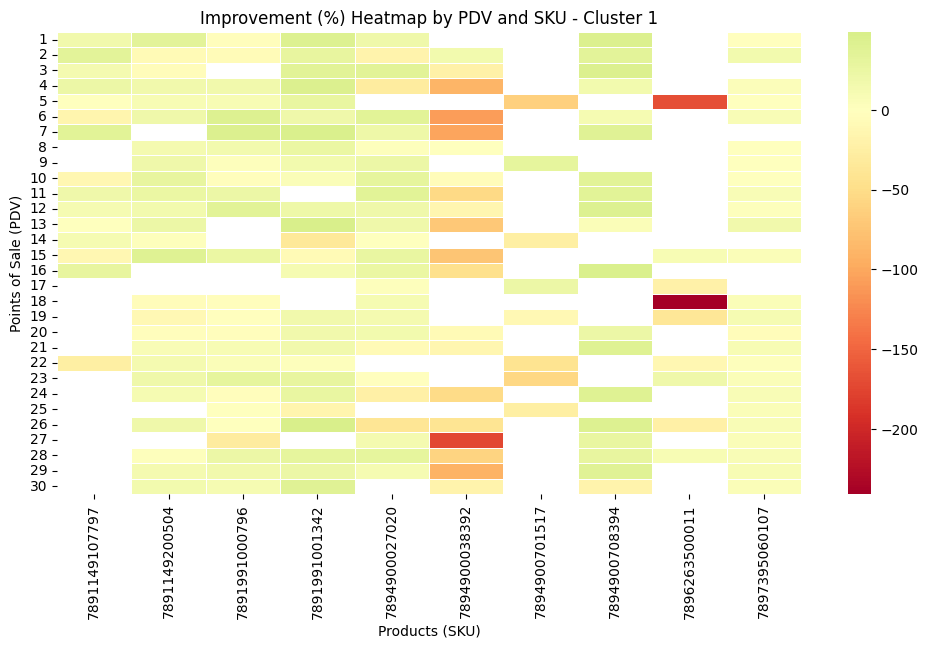

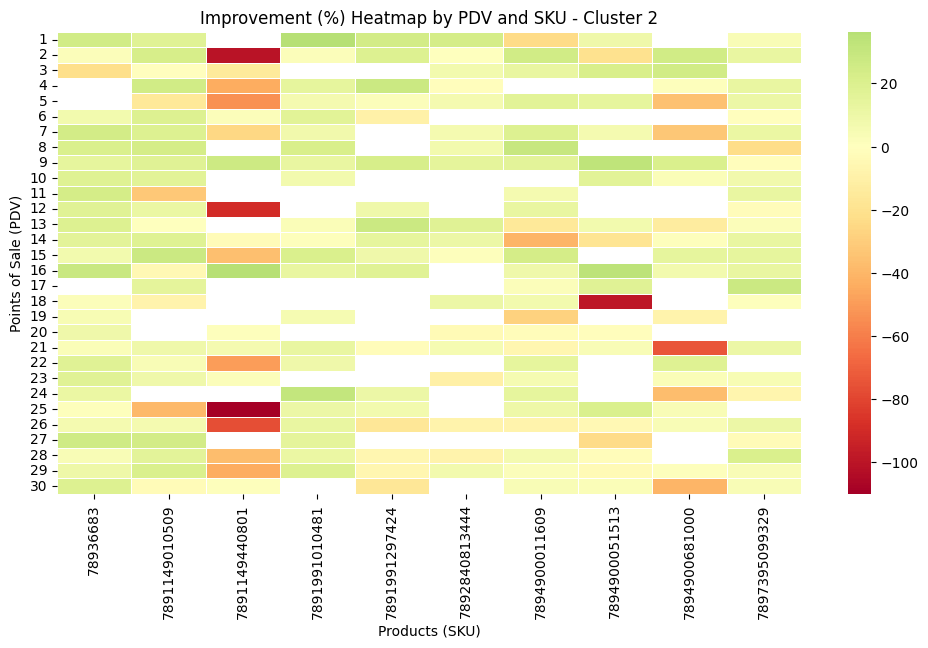

In [40]:
# List of datasets and titles
datasets = [test_0, test_1, test_2]
titles = ["Cluster 0", "Cluster 1", "Cluster 2"]

# Loop through datasets and create separate plots
for data, title in zip(datasets, titles):
    plt.figure(figsize=(12, 6))  # Create a new figure for each heatmap
    pivot_data = data.pivot_table(index='pdv_codigo', columns='codigo_barras_sku', values='mejora_%')

    sns.heatmap(pivot_data, cmap="RdYlGn", center=0, annot=False, linewidths=0.5)
    
    plt.title(f"Improvement (%) Heatmap by PDV and SKU - {title}")
    plt.xlabel("Products (SKU)")
    plt.ylabel("Points of Sale (PDV)")
    
    plt.show()  # Show each heatmap separately

# TFT 

In [4]:
# 40000 seg  no presentativo
tft_0 = pd.read_csv('/Users/santiagoromano/Documents/code/MasterThesis/results/metrics_cluster_0_tft.csv')
tft_0 = tft_0[['pdv_codigo', 'codigo_barras_sku',
         'rmse_cant_vta_pred_tft_mean']]
print(tft_0['codigo_barras_sku'].nunique(), tft_0.shape, tft_0[['codigo_barras_sku','pdv_codigo']].drop_duplicates().shape)
# # 27491 sef 
tft_1 = pd.read_csv('/Users/santiagoromano/Documents/code/MasterThesis/results/metrics_cluster_1_tft.csv')
tft_1 = tft_1[['pdv_codigo', 'codigo_barras_sku', 'mse_cant_vta_pred_tft_mean',
         'rmse_cant_vta_pred_tft_mean']]
print(tft_1['codigo_barras_sku'].nunique(), tft_1.shape, tft_1[['codigo_barras_sku','pdv_codigo']].drop_duplicates().shape)

# 46173 seg , not rep.
tft_2 = pd.read_csv('/Users/santiagoromano/Documents/code/MasterThesis/results/metrics_cluster_2_tft.csv')
tft_2 = tft_2[['pdv_codigo', 'codigo_barras_sku', 'mse_cant_vta_pred_tft_mean',
            'rmse_cant_vta_pred_tft_mean']]
print(tft_2['codigo_barras_sku'].nunique(), tft_2.shape, tft_2[['codigo_barras_sku','pdv_codigo']].drop_duplicates().shape)

10 (219, 3) (219, 2)
10 (198, 4) (198, 2)
10 (223, 4) (223, 2)


In [5]:
print(tft_0['rmse_cant_vta_pred_tft_mean'].median(),tft_0['rmse_cant_vta_pred_tft_mean'].mean())
print(tft_1['rmse_cant_vta_pred_tft_mean'].median(),tft_1['rmse_cant_vta_pred_tft_mean'].mean())
print(tft_2['rmse_cant_vta_pred_tft_mean'].median(),tft_2['rmse_cant_vta_pred_tft_mean'].mean())

6551.0 9316.599543378994
37427.05 144550.42070707073
18026.3 28607.838565022423


best_rmse
rmse_cant_vta_pred_tft_mean        117
rmse_cant_vta_pred_mean_pdv_sku    102
Name: count, dtype: int64
best_rmse
rmse_cant_vta_pred_tft_mean        131
rmse_cant_vta_pred_mean_pdv_sku     67
Name: count, dtype: int64
best_rmse
rmse_cant_vta_pred_tft_mean        157
rmse_cant_vta_pred_mean_pdv_sku     66
Name: count, dtype: int64


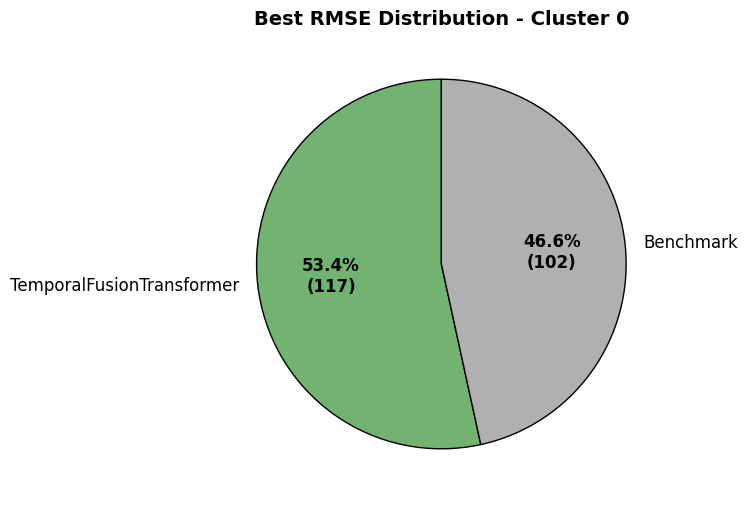

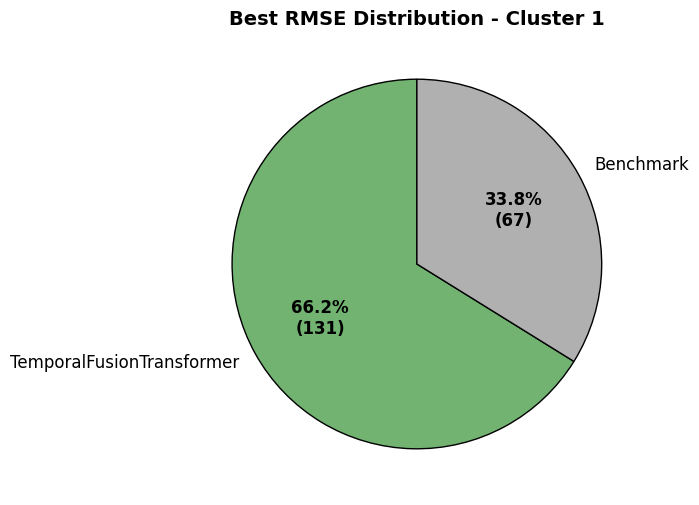

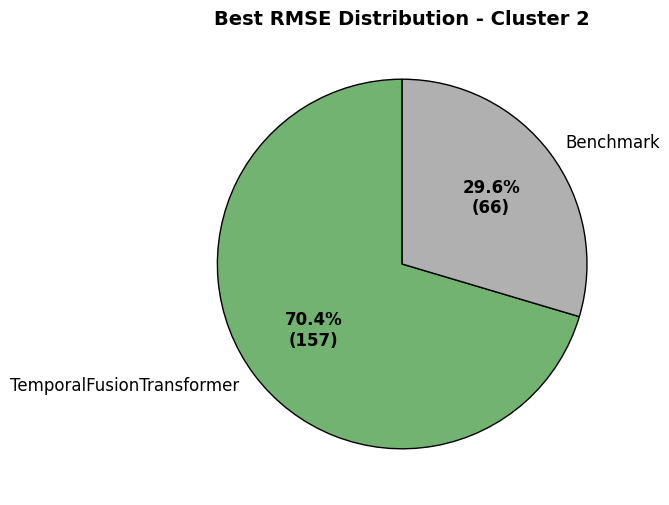

In [6]:
#a)
test_0 = tft_0.merge(mean_0, on=['pdv_codigo', 'codigo_barras_sku'], how='inner')
summary_0 = create_summary_dataframe(test_0)
print(summary_0['best_rmse'].value_counts())

test_1 = tft_1.merge(mean_1, on=['pdv_codigo', 'codigo_barras_sku'], how='inner')
summary_1 = create_summary_dataframe(test_1)
print(summary_1['best_rmse'].value_counts())

test_2 = tft_2.merge(mean_2, on=['pdv_codigo', 'codigo_barras_sku'], how='inner')
summary_2 = create_summary_dataframe(test_2)
print(summary_2['best_rmse'].value_counts())

# Define professional-looking colors
color_mapping = {
    "rmse_cant_vta_pred_mean_pdv_sku": "#B0B0B0",  # Light Grey for Benchmark
    "rmse_cant_vta_pred_tft_mean": "#72B372"      # Soft Green for SimpleFeedForward
}
label_mapping = {
    "rmse_cant_vta_pred_mean_pdv_sku": "Benchmark",
    "rmse_cant_vta_pred_tft_mean": "TemporalFusionTransformer"
}


# List of summaries and titles
summaries = [summary_0, summary_1, summary_2]
titles = ["Cluster 0", "Cluster 1", "Cluster 2"]
# Generate separate pie charts with the same size
for summary, title in zip(summaries, titles):
    fig, ax = plt.subplots(figsize=(6, 6))  # Ensure same size for all figures
    
    # Count values for 'best_rmse' and rename labels
    value_counts = summary['best_rmse'].value_counts()
    labels = [label_mapping[label] for label in value_counts.index]  # Map to new labels
    colors = [color_mapping[label] for label in value_counts.index]  # Map to colors
    
    # Define custom function to show percentage on top and count below
    def make_autopct(values):
        def autopct(pct):
            total = sum(values)
            count = int(round(pct * total / 100.0))
            return f'{pct:.1f}%\n({count})'  # Line break between % and count
        return autopct

    
    # Create the pie chart
    wedges, texts, autotexts = ax.pie(
        value_counts, labels=labels, 
        autopct=make_autopct(value_counts),  # Show % and count
        startangle=90, colors=colors,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1},  # Adds border for clarity
        textprops={'fontsize': 12, 'color': 'black'}  # Improve text readability
    )
    
    # Make percentage labels bold
    for autotext in autotexts:
        autotext.set_fontweight("bold")
    
    # Add title with better formatting
    ax.set_title(f"Best RMSE Distribution - {title}", fontsize=14, fontweight="bold")
    
    # Show the plot
    plt.show()


In [10]:
#   b)
test_0['mejora_%'] =  round(((test_0['rmse_cant_vta_pred_mean_pdv_sku'] - test_0['rmse_cant_vta_pred_tft_mean']) / test_0['rmse_cant_vta_pred_mean_pdv_sku'])*100,3)
# print(test_0['mejora_%'].describe())

test_1['mejora_%'] =  round(((test_1['rmse_cant_vta_pred_mean_pdv_sku'] - test_1['rmse_cant_vta_pred_tft_mean']) / test_1['rmse_cant_vta_pred_mean_pdv_sku'])*100,3)
# print(test_1['mejora_%'].describe())

test_2['mejora_%'] =  round(((test_2['rmse_cant_vta_pred_mean_pdv_sku'] - test_2['rmse_cant_vta_pred_tft_mean']) / test_2['rmse_cant_vta_pred_mean_pdv_sku'])*100,3)
# print(test_2['mejora_%'].describe())


# 2. Estadísticos
print(f"cluster 0: tft gana en {(test_0['mejora_%'] > 0).mean():.1%} de casos")
print(f"Mediana de la mejora: {test_0[test_0['mejora_%'] > 0]['mejora_%'].median():.1f}%")

print(f"cluster 1: tft gana en {(test_1['mejora_%'] > 0).mean():.1%} de casos")
print(f"Mediana de la mejora: {test_1[test_1['mejora_%'] > 0]['mejora_%'].median():.1f}%")

print(f"cluster 2: tft gana en {(test_2['mejora_%'] > 0).mean():.1%} de casos")
print(f"Mediana de la mejora: {test_2[test_2['mejora_%'] > 0]['mejora_%'].median():.1f}%")

cluster 0: tft gana en 53.4% de casos
Mediana de la mejora: 6.0%
cluster 1: tft gana en 66.2% de casos
Mediana de la mejora: 12.2%
cluster 2: tft gana en 70.4% de casos
Mediana de la mejora: 13.5%


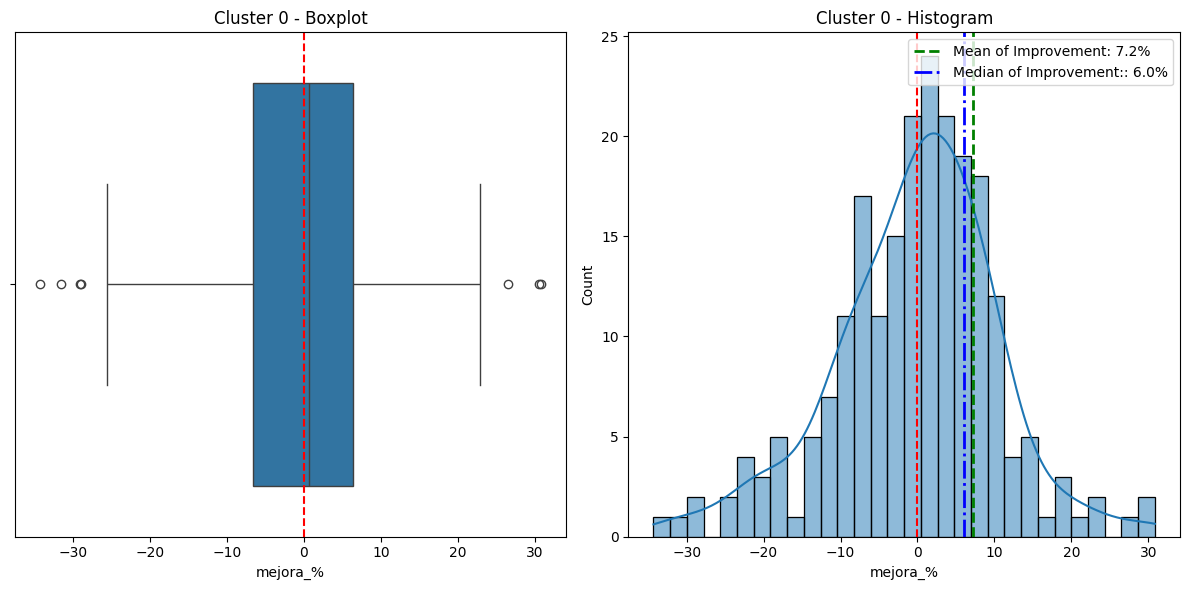

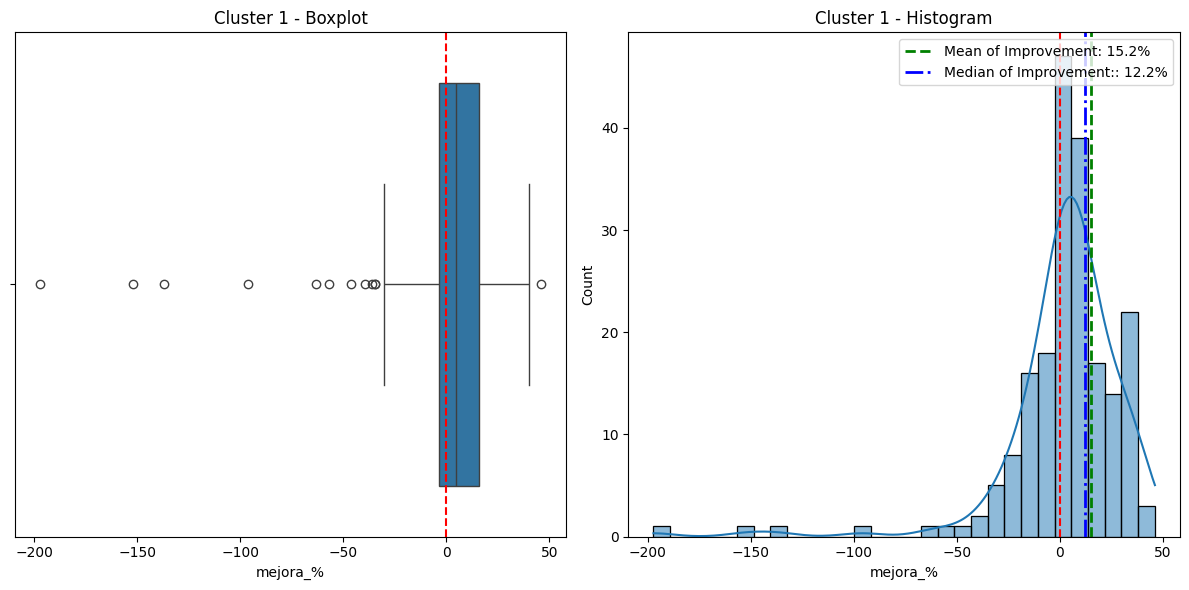

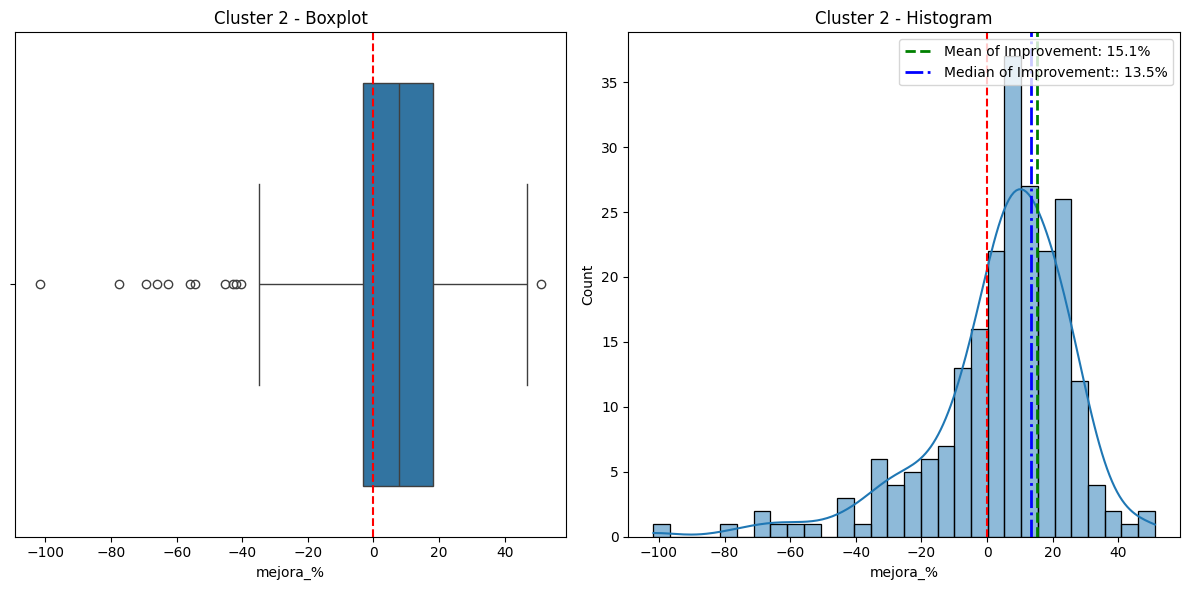

In [11]:
# List of datasets and titles
datasets = [test_0, test_1, test_2]
titles = ["Cluster 0", "Cluster 1", "Cluster 2"]

for data, title in zip(datasets, titles):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Boxplot
    sns.boxplot(data=data, x='mejora_%', ax=axes[0])
    axes[0].axvline(0, color='red', linestyle='--')
    axes[0].set_title(f"{title} - Boxplot")

    # Histogram
    sns.histplot(data['mejora_%'], bins=30, kde=True, ax=axes[1])
    axes[1].axvline(0, color='red', linestyle='--')

    # Calculate mean and median (only positive improvements if needed)
    positive_improvements = data[data['mejora_%'] > 0]['mejora_%']
    mean_value = positive_improvements.mean()
    median_value = positive_improvements.median()

    # Add vertical lines for mean and median
    axes[1].axvline(mean_value, color='green', linestyle='--', linewidth=2, label=f'Mean of Improvement: {mean_value:.1f}%')
    axes[1].axvline(median_value, color='blue', linestyle='-.', linewidth=2, label=f'Median of Improvement:: {median_value:.1f}%')

    # Add legend
    axes[1].legend(loc='upper right', fontsize=10)

    axes[1].set_title(f"{title} - Histogram")

    plt.tight_layout()
    plt.show()

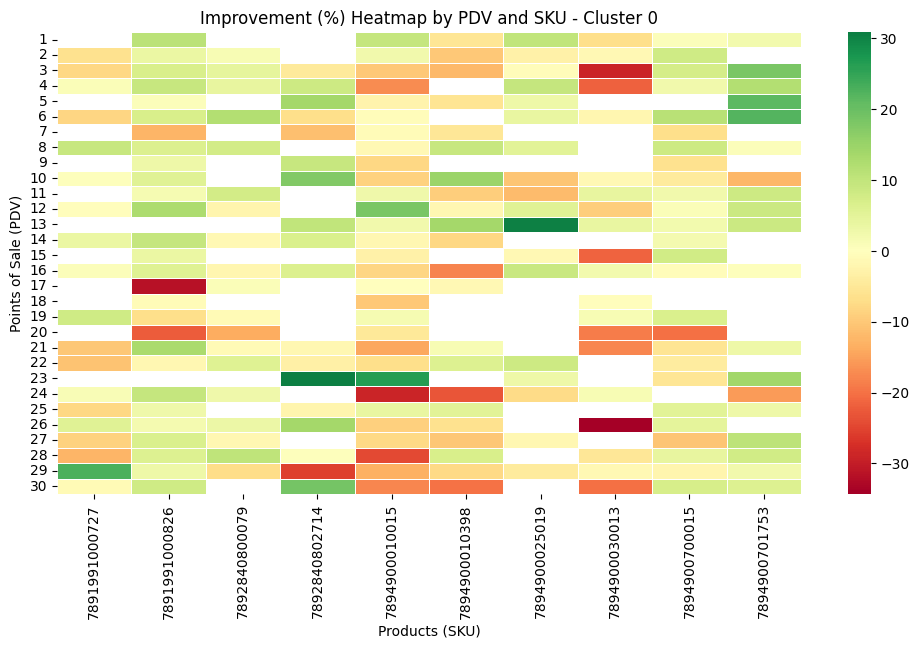

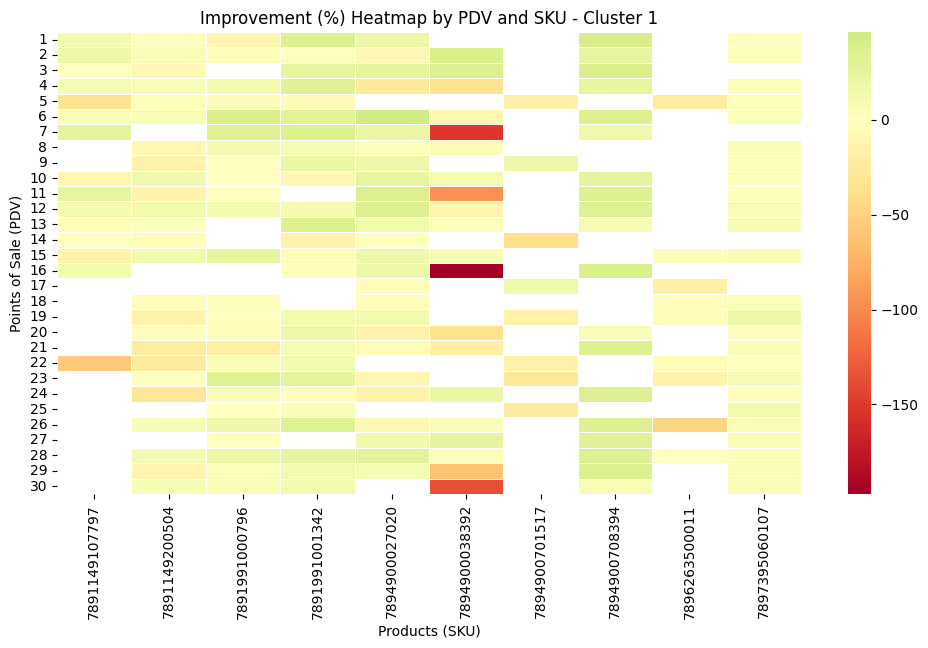

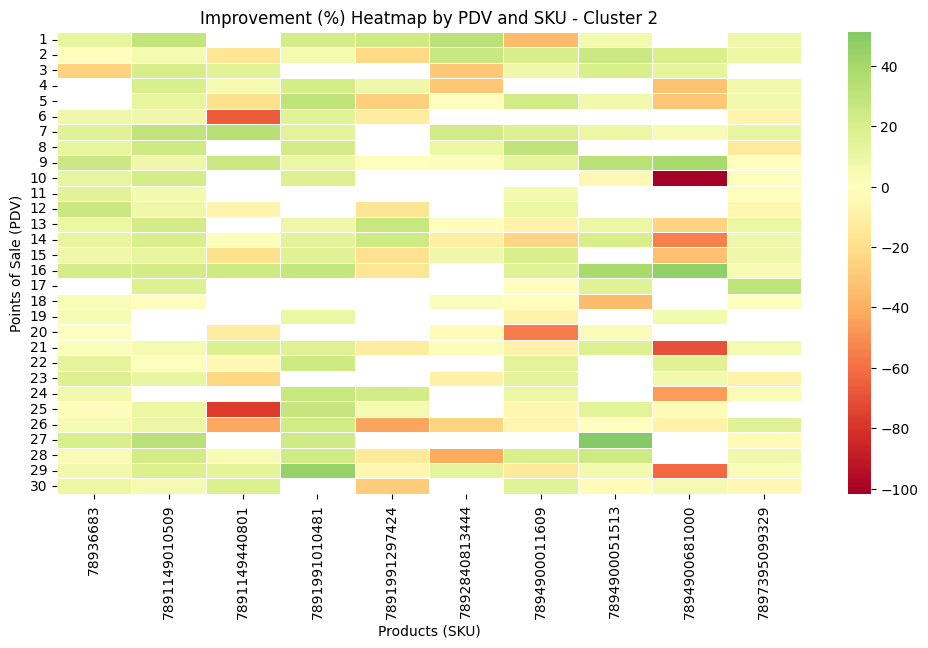

In [12]:
# List of datasets and titles
datasets = [test_0, test_1, test_2]
titles = ["Cluster 0", "Cluster 1", "Cluster 2"]

# Loop through datasets and create separate plots
for data, title in zip(datasets, titles):
    plt.figure(figsize=(12, 6))  # Create a new figure for each heatmap
    pivot_data = data.pivot_table(index='pdv_codigo', columns='codigo_barras_sku', values='mejora_%')

    sns.heatmap(pivot_data, cmap="RdYlGn", center=0, annot=False, linewidths=0.5)
    
    plt.title(f"Improvement (%) Heatmap by PDV and SKU - {title}")
    plt.xlabel("Products (SKU)")
    plt.ylabel("Points of Sale (PDV)")
    
    plt.show()  # Show each heatmap separately

# wave net

In [17]:
#  seg
wavenet_0 = pd.read_csv('/Users/santiagoromano/Documents/code/MasterThesis/results/metrics_cluster_0_wavenet.csv')
wavenet_0.columns
wavenet_0['rmse_cant_vta_pred_wavenet'] = np.where(
    wavenet_0['rmse_cant_vta_pred_wavenet_mean'] < wavenet_0['rmse_cant_vta_pred_wavenet_median'],
    wavenet_0['rmse_cant_vta_pred_wavenet_mean'],
    wavenet_0['rmse_cant_vta_pred_wavenet_median']
)
wavenet_0 = wavenet_0[['pdv_codigo', 'codigo_barras_sku',
                        'rmse_cant_vta_pred_wavenet']]




In [18]:
print(wavenet_0['rmse_cant_vta_pred_wavenet'].median(),wavenet_0['rmse_cant_vta_pred_wavenet'].mean())
# print(wavenet_1['rmse_cant_vta_pred_wavenet'].median(),wavenet_1['rmse_cant_vta_pred_wavenet'].mean())
# print(wavenet_2['rmse_cant_vta_pred_wavenet'].median(),wavenet_2['rmse_cant_vta_pred_wavenet'].mean())

6549.0 8924.223744292238


best_rmse
rmse_cant_vta_pred_wavenet         138
rmse_cant_vta_pred_mean_pdv_sku     81
Name: count, dtype: int64


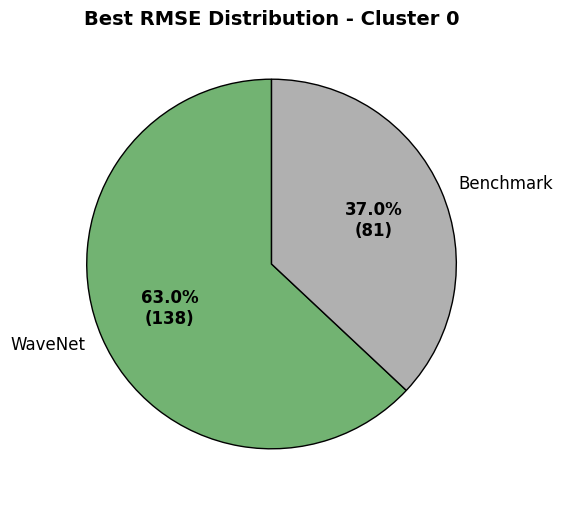

In [20]:
#a)
test_0 = wavenet_0.merge(mean_0, on=['pdv_codigo', 'codigo_barras_sku'], how='inner')
summary_0 = create_summary_dataframe(test_0)
print(summary_0['best_rmse'].value_counts())

# test_1 = wavenet_1.merge(mean_1, on=['pdv_codigo', 'codigo_barras_sku'], how='inner')
# summary_1 = create_summary_dataframe(test_1)
# print(summary_1['best_rmse'].value_counts())

# test_2 = wavenet_2.merge(mean_2, on=['pdv_codigo', 'codigo_barras_sku'], how='inner')
# summary_2 = create_summary_dataframe(test_2)
# print(summary_2['best_rmse'].value_counts())

# Define professional-looking colors
color_mapping = {
    "rmse_cant_vta_pred_mean_pdv_sku": "#B0B0B0",  # Light Grey for Benchmark
    "rmse_cant_vta_pred_wavenet": "#72B372"      # Soft Green for SimpleFeedForward
}
label_mapping = {
    "rmse_cant_vta_pred_mean_pdv_sku": "Benchmark",
    "rmse_cant_vta_pred_wavenet": "WaveNet"
}

# List of summaries and titles
# summaries = [summary_0, summary_1, summary_2]
# titles = ["Cluster 0", "Cluster 1", "Cluster 2"]

summaries = [summary_0]
titles = ["Cluster 0"]

# Generate separate pie charts with the same size
for summary, title in zip(summaries, titles):
    fig, ax = plt.subplots(figsize=(6, 6))  # Ensure same size for all figures
    
    # Count values for 'best_rmse' and rename labels
    value_counts = summary['best_rmse'].value_counts()
    labels = [label_mapping[label] for label in value_counts.index]  # Map to new labels
    colors = [color_mapping[label] for label in value_counts.index]  # Map to colors
    
    # Define custom function to show percentage on top and count below
    def make_autopct(values):
        def autopct(pct):
            total = sum(values)
            count = int(round(pct * total / 100.0))
            return f'{pct:.1f}%\n({count})'  # Line break between % and count
        return autopct

    
    # Create the pie chart
    wedges, texts, autotexts = ax.pie(
        value_counts, labels=labels, 
        autopct=make_autopct(value_counts),  # Show % and count
        startangle=90, colors=colors,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1},  # Adds border for clarity
        textprops={'fontsize': 12, 'color': 'black'}  # Improve text readability
    )
    
    # Make percentage labels bold
    for autotext in autotexts:
        autotext.set_fontweight("bold")
    
    # Add title with better formatting
    ax.set_title(f"Best RMSE Distribution - {title}", fontsize=14, fontweight="bold")
    
    # Show the plot
    plt.show()

In [21]:
#   b)
test_0['mejora_%'] =  round(((test_0['rmse_cant_vta_pred_mean_pdv_sku'] - test_0['rmse_cant_vta_pred_wavenet']) / test_0['rmse_cant_vta_pred_mean_pdv_sku'])*100,3)
# print(test_0['mejora_%'].describe())

# test_1['mejora_%'] =  round(((test_1['rmse_cant_vta_pred_mean_pdv_sku'] - test_1['rmse_cant_vta_pred_wavenet']) / test_1['rmse_cant_vta_pred_mean_pdv_sku'])*100,3)
# print(test_1['mejora_%'].describe())

# test_2['mejora_%'] =  round(((test_2['rmse_cant_vta_pred_mean_pdv_sku'] - test_2['rmse_cant_vta_pred_wavenet']) / test_2['rmse_cant_vta_pred_mean_pdv_sku'])*100,3)
# print(test_2['mejora_%'].describe())

# 2. Estadísticos
print(f"cluster 0: wavenet gana en {(test_0['mejora_%'] > 0).mean():.1%} de casos")
print(f"Mediana de la mejora: {test_0[test_0['mejora_%'] > 0]['mejora_%'].median():.1f}%")

# print(f"cluster 1: wavenet gana en {(test_1['mejora_%'] > 0).mean():.1%} de casos")
# print(f"Mediana de la mejora: {test_1[test_1['mejora_%'] > 0]['mejora_%'].median():.1f}%")

# print(f"cluster 2: wavenet gana en {(test_2['mejora_%'] > 0).mean():.1%} de casos")
# print(f"Mediana de la mejora: {test_2[test_2['mejora_%'] > 0]['mejora_%'].median():.1f}%")


cluster 0: wavenet gana en 63.0% de casos
Mediana de la mejora: 7.7%


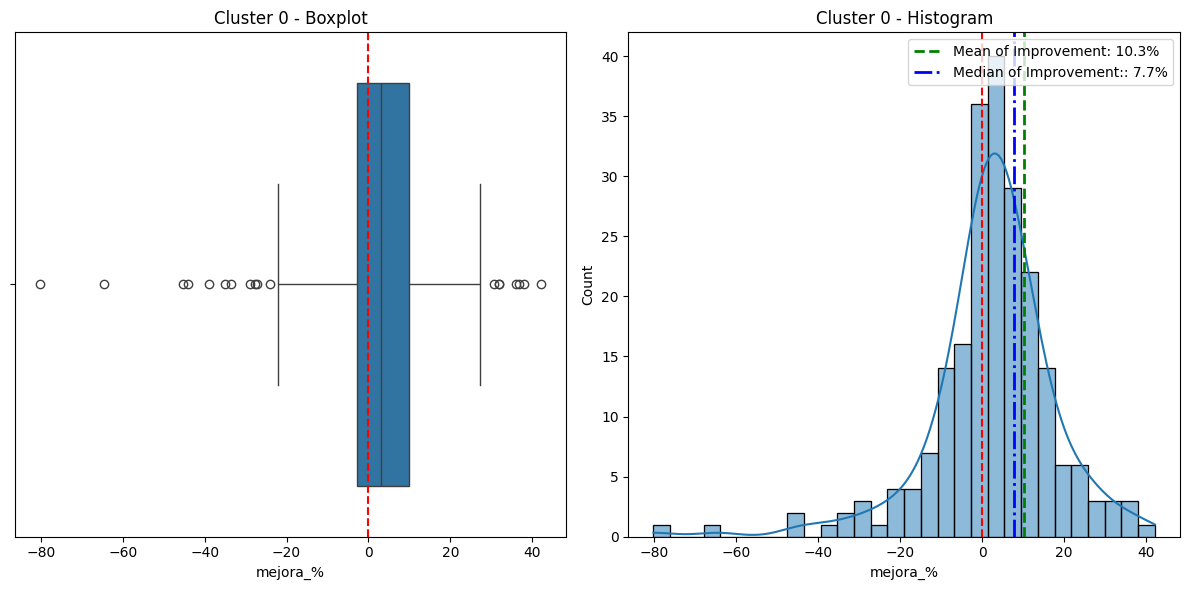

In [22]:
# List of datasets and titles
# datasets = [test_0, test_1, test_2]
# titles = ["Cluster 0", "Cluster 1", "Cluster 2"]

datasets = [test_0]
titles = ["Cluster 0"]

for data, title in zip(datasets, titles):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Boxplot
    sns.boxplot(data=data, x='mejora_%', ax=axes[0])
    axes[0].axvline(0, color='red', linestyle='--')
    axes[0].set_title(f"{title} - Boxplot")

    # Histogram
    sns.histplot(data['mejora_%'], bins=30, kde=True, ax=axes[1])
    axes[1].axvline(0, color='red', linestyle='--')

    # Calculate mean and median (only positive improvements if needed)
    positive_improvements = data[data['mejora_%'] > 0]['mejora_%']
    mean_value = positive_improvements.mean()
    median_value = positive_improvements.median()

    # Add vertical lines for mean and median
    axes[1].axvline(mean_value, color='green', linestyle='--', linewidth=2, label=f'Mean of Improvement: {mean_value:.1f}%')
    axes[1].axvline(median_value, color='blue', linestyle='-.', linewidth=2, label=f'Median of Improvement:: {median_value:.1f}%')

    # Add legend
    axes[1].legend(loc='upper right', fontsize=10)

    axes[1].set_title(f"{title} - Histogram")

    plt.tight_layout()
    plt.show()

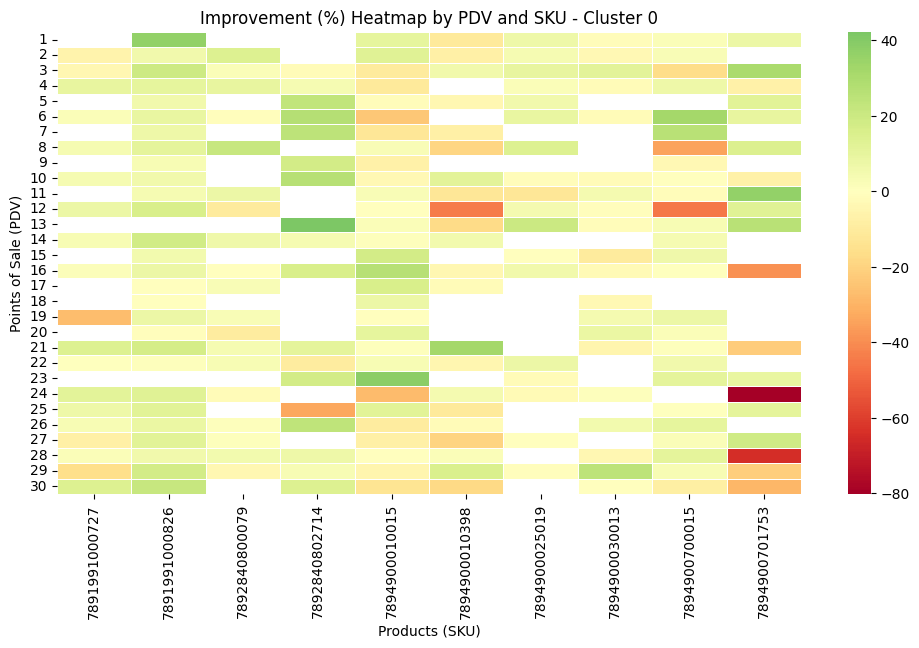

In [23]:
# Loop through datasets and create separate plots
for data, title in zip(datasets, titles):
    plt.figure(figsize=(12, 6))  # Create a new figure for each heatmap
    pivot_data = data.pivot_table(index='pdv_codigo', columns='codigo_barras_sku', values='mejora_%')

    sns.heatmap(pivot_data, cmap="RdYlGn", center=0, annot=False, linewidths=0.5)
    
    plt.title(f"Improvement (%) Heatmap by PDV and SKU - {title}")
    plt.xlabel("Products (SKU)")
    plt.ylabel("Points of Sale (PDV)")
    
    plt.show()  # Show each heatmap separately

In [58]:
def analyze_model(df, model_name):
    """Analyzes RMSE metrics for a single model"""
    # Find RMSE column automatically
    rmse_col = [col for col in df.columns if 'rmse' in col.lower()][0]
    rmse_values = df[rmse_col]
    
    print(f"\n=== Analysis for {model_name} model ===")
    print("Basic Statistics:")
    print(rmse_values.describe())
    
    print("\nKey Percentiles:")
    print(rmse_values.quantile([0.05, 0.25, 0.5, 0.75, 0.95]))
    
    # Visualization
    plt.figure(figsize=(12, 5))
    
    # Boxplot
    plt.subplot(1, 2, 1)
    sns.boxplot(y=rmse_values)
    plt.title(f'RMSE Distribution - {model_name}')
    plt.ylabel('RMSE Value')
    
    # Histogram with KDE
    plt.subplot(1, 2, 2)
    ax = sns.histplot(rmse_values, kde=True, bins=30)
    
    # Add mean/median lines
    mean_val = rmse_values.mean()
    median_val = rmse_values.median()
    ax.axvline(mean_val, color='r', linestyle='--', label=f'Mean: {mean_val:.2f}')
    ax.axvline(median_val, color='g', linestyle='-', label=f'Median: {median_val:.2f}')
    
    plt.title(f'RMSE Histogram - {model_name}')
    plt.xlabel('RMSE Value')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    return rmse_values

In [99]:
def compare_6models_hist_boxplot(df1, model1_name,
                                df2, model2_name,
                                df3, model3_name,
                                df4, model4_name,
                                df5, model5_name,
                                df6, model6_name,
                                cluster=None):
    """
    Compare 6 models with cluster-specific titles if provided
    
    Parameters:
    -----------
    df1-df6 : DataFrames with RMSE columns
    model1_name-model6_name : Model display names
    cluster : Optional cluster number to include in titles
    """
    
    # Extract RMSE values
    def get_rmse(df):
        rmse_col = [col for col in df.columns if 'rmse' in col.lower()][0]
        return df[rmse_col]
    
    rmse_data = {
        model1_name: get_rmse(df1),
        model2_name: get_rmse(df2),
        model3_name: get_rmse(df3),
        model4_name: get_rmse(df4),
        model5_name: get_rmse(df5),
        model6_name: get_rmse(df6)
    }
    
    # Calculate global min/max for consistent x-axis
    all_values = np.concatenate(list(rmse_data.values()))
    global_min = np.min(all_values)
    global_max = np.max(all_values)
    
    # Create figure with adjusted grid layout
    fig = plt.figure(figsize=(18, 24))
    gs = fig.add_gridspec(6, 2, width_ratios=[3, 1])
    
    # Add cluster to title if specified
    title_suffix = f" (Cluster {cluster})" if cluster is not None else ""
    
    # Plot histograms with shared x-axis
    for i, (name, values) in enumerate(rmse_data.items(), 1):
        ax_hist = fig.add_subplot(gs[i-1, 0])
        sns.histplot(values, bins=20, kde=True, ax=ax_hist)
        ax_hist.set_xlim(global_min, global_max)
        
        mean = values.mean()
        median = values.median()
        
        ax_hist.axvline(mean, color='r', linestyle='--', label=f'Mean: {mean:.2f}')
        ax_hist.axvline(median, color='g', linestyle='-', label=f'Median: {median:.2f}')
        
        ax_hist.text(0.95, 0.95, f'Mean: {mean:.2f}\nMedian: {median:.2f}',
                    transform=ax_hist.transAxes,
                    verticalalignment='top',
                    horizontalalignment='right',
                    bbox=dict(facecolor='white', alpha=0.8))
        
        ax_hist.set_title(f'{name} - RMSE Distribution{title_suffix}')
        ax_hist.set_xlabel('RMSE')
        ax_hist.legend(loc='upper left')
    
    # Plot narrower boxplots
    for i, (name, values) in enumerate(rmse_data.items(), 1):
        ax_box = fig.add_subplot(gs[i-1, 1])
        sns.boxplot(y=values, ax=ax_box, width=0.5)
        
        current_mean = values.mean()
        current_median = values.median()
        
        ax_box.text(0.1, 0.95, f'Mean: {current_mean:.2f}\nMedian: {current_median:.2f}',
                  transform=ax_box.transAxes,
                  verticalalignment='top',
                  bbox=dict(facecolor='white', alpha=0.8))
        
        ax_box.set_title(f'{name} - Spread{title_suffix}')
        ax_box.set_ylabel('')
    
    plt.tight_layout()
    plt.show()
    
    # Print summary with cluster info if provided
    print(f"\n=== RMSE Summary {title_suffix} ===")
    summary = pd.DataFrame({
        'Mean': [values.mean() for values in rmse_data.values()],
        'Median': [values.median() for values in rmse_data.values()],
        'Std Dev': [values.std() for values in rmse_data.values()],
        'Min': [values.min() for values in rmse_data.values()],
        'Max': [values.max() for values in rmse_data.values()]
    }, index=rmse_data.keys())
    
    print(summary.round(2))

In [139]:
test_0 = sff_0.merge(tft_0, on=['pdv_codigo', 'codigo_barras_sku'], how='inner')
test_0 = test_0.merge(deepar_mean_0, on=['pdv_codigo', 'codigo_barras_sku'], how='inner')
test_0 = test_0.merge(deepar_median_0, on=['pdv_codigo', 'codigo_barras_sku'], how='inner')
test_0 = test_0.merge(wavenet_0, on=['pdv_codigo', 'codigo_barras_sku'], how='inner')
test_0 = test_0.merge(mean_0, on=['pdv_codigo', 'codigo_barras_sku'], how='inner')

summary_0 = create_summary_dataframe(test_0)
summary_0['best_rmse'].value_counts(), summary_0['best_mse'].value_counts()

(best_rmse
 rmse_cant_vta_pred_wavenet_mean     21
 rmse_cant_vta_pred_tft_mean         12
 rmse_cant_vta_pred_sff_mean         10
 rmse_cant_vta_pred_mean_pdv_sku      8
 rmse_cant_vta_pred_deepar_median     7
 rmse_cant_vta_pred_deepar_mean       5
 Name: count, dtype: int64,
 best_mse
 mse_cant_vta_pred_wavenet_mean     21
 mse_cant_vta_pred_tft_mean         12
 mse_cant_vta_pred_sff_mean         10
 mse_cant_vta_pred_mean_pdv_sku      8
 mse_cant_vta_pred_deepar_median     7
 mse_cant_vta_pred_deepar_mean       5
 Name: count, dtype: int64)

In [140]:
test_1 = sff_1.merge(tft_1, on=['pdv_codigo', 'codigo_barras_sku'], how='inner')
test_1 = test_1.merge(deepar_mean_1, on=['pdv_codigo', 'codigo_barras_sku'], how='inner')
test_1 = test_1.merge(deepar_median_1, on=['pdv_codigo', 'codigo_barras_sku'], how='inner')
test_1 = test_1.merge(wavenet_1, on=['pdv_codigo', 'codigo_barras_sku'], how='inner')
test_1 = test_1.merge(mean_1, on=['pdv_codigo', 'codigo_barras_sku'], how='inner')

summary_1 = create_summary_dataframe(test_1)
summary_1['best_rmse'].value_counts(), summary_1['best_mse'].value_counts()

(best_rmse
 rmse_cant_vta_pred_sff_mean         49
 rmse_cant_vta_pred_deepar_median    33
 rmse_cant_vta_pred_wavenet_mean     27
 rmse_cant_vta_pred_deepar_mean      24
 rmse_cant_vta_pred_tft_mean         15
 rmse_cant_vta_pred_mean_pdv_sku      8
 Name: count, dtype: int64,
 best_mse
 mse_cant_vta_pred_sff_mean         49
 mse_cant_vta_pred_deepar_median    33
 mse_cant_vta_pred_wavenet_mean     27
 mse_cant_vta_pred_deepar_mean      24
 mse_cant_vta_pred_tft_mean         15
 mse_cant_vta_pred_mean_pdv_sku      8
 Name: count, dtype: int64)

In [141]:
test_2 = sff_2.merge(tft_2, on=['pdv_codigo', 'codigo_barras_sku'], how='inner')
test_2 = test_2.merge(deepar_mean_2, on=['pdv_codigo', 'codigo_barras_sku'], how='inner')
test_2 = test_2.merge(deepar_median_2, on=['pdv_codigo', 'codigo_barras_sku'], how='inner')
test_2 = test_2.merge(wavenet_2, on=['pdv_codigo', 'codigo_barras_sku'], how='inner')
test_2 = test_2.merge(mean_2, on=['pdv_codigo', 'codigo_barras_sku'], how='inner')

summary_2 = create_summary_dataframe(test_2)
summary_2['best_rmse'].value_counts(), summary_2['best_mse'].value_counts()

(best_rmse
 rmse_cant_vta_pred_sff_mean         28
 rmse_cant_vta_pred_tft_mean         20
 rmse_cant_vta_pred_deepar_median    14
 rmse_cant_vta_pred_wavenet_mean     13
 rmse_cant_vta_pred_deepar_mean      12
 rmse_cant_vta_pred_mean_pdv_sku      1
 Name: count, dtype: int64,
 best_mse
 mse_cant_vta_pred_sff_mean         28
 mse_cant_vta_pred_tft_mean         20
 mse_cant_vta_pred_deepar_median    14
 mse_cant_vta_pred_wavenet_mean     13
 mse_cant_vta_pred_deepar_mean      12
 mse_cant_vta_pred_mean_pdv_sku      1
 Name: count, dtype: int64)

In [145]:
def plot_best_model_pies(cluster_num):
    """
    Create pie charts with pretty model names in visuals but keep technical names in data
    """
    # Model display name mapping (for visualization only)
    DISPLAY_NAMES = {
        'rmse_cant_vta_pred_tft_mean': 'Temporal Fusion\nTransformer',
        'rmse_cant_vta_pred_deepar_mean': 'DeepAR Mean',
        'rmse_cant_vta_pred_deepar_median': 'DeepAR Median',
        'rmse_cant_vta_pred_sff_mean': 'Simple Feed\nForward',
        'rmse_cant_vta_pred_wavenet_mean': 'WaveNet',
        'rmse_cant_vta_pred_mean_pdv_sku': 'Mean PDV-SKU',
        # MSE versions (if different)
        'mse_cant_vta_pred_tft_mean': 'Temporal Fusion\nTransformer',
        'mse_cant_vta_pred_deepar_mean': 'DeepAR Mean',
        'mse_cant_vta_pred_deepar_median': 'DeepAR Median',
        'mse_cant_vta_pred_sff_mean': 'Simple Feed\nForward',
        'mse_cant_vta_pred_wavenet_mean': 'WaveNet',
        'mse_cant_vta_pred_mean_pdv_sku': 'Mean PDV-SKU'
    }

    # Get summary data
    try:
        summary_df = globals()[f'summary_{cluster_num}'].copy()
    except KeyError:
        raise ValueError(f"summary_{cluster_num} not found")

    # Create figure
    plt.figure(figsize=(16, 8))
    
    # Custom color palette
    colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B2', '#CCB974', '#64B5CD']
    
    # 1. RMSE Pie Chart
    plt.subplot(1, 2, 1)
    rmse_counts = summary_df['best_rmse'].value_counts()
    
    # Map to display names just for visualization
    rmse_display = rmse_counts.rename(index=DISPLAY_NAMES)
    rmse_display.plot.pie(
        autopct=lambda p: f'{p:.1f}%\n({int(p/100*rmse_counts.sum())})',
        startangle=90,
        colors=colors,
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
        textprops={'fontsize': 9}
    )
    plt.title(f'Best Models by RMSE\n(Cluster {cluster_num})', pad=20, fontsize=12)
    plt.ylabel('')

    # 2. MSE Pie Chart
    plt.subplot(1, 2, 2)
    mse_counts = summary_df['best_mse'].value_counts()
    
    # Map to display names just for visualization
    mse_display = mse_counts.rename(index=DISPLAY_NAMES)
    mse_display.plot.pie(
        autopct=lambda p: f'{p:.1f}%\n({int(p/100*mse_counts.sum())})',
        startangle=90,
        colors=colors,
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
        textprops={'fontsize': 9}
    )
    plt.title(f'Best Models by MSE\n(Cluster {cluster_num})', pad=20, fontsize=12)
    plt.ylabel('')

    plt.tight_layout()
    plt.show()

    # Print original counts with technical names
    print(f"\nCluster {cluster_num} - Best RMSE counts (original names):")
    print(rmse_counts.to_string())
    print(f"\nCluster {cluster_num} - Best MSE counts (original names):")
    print(mse_counts.to_string())

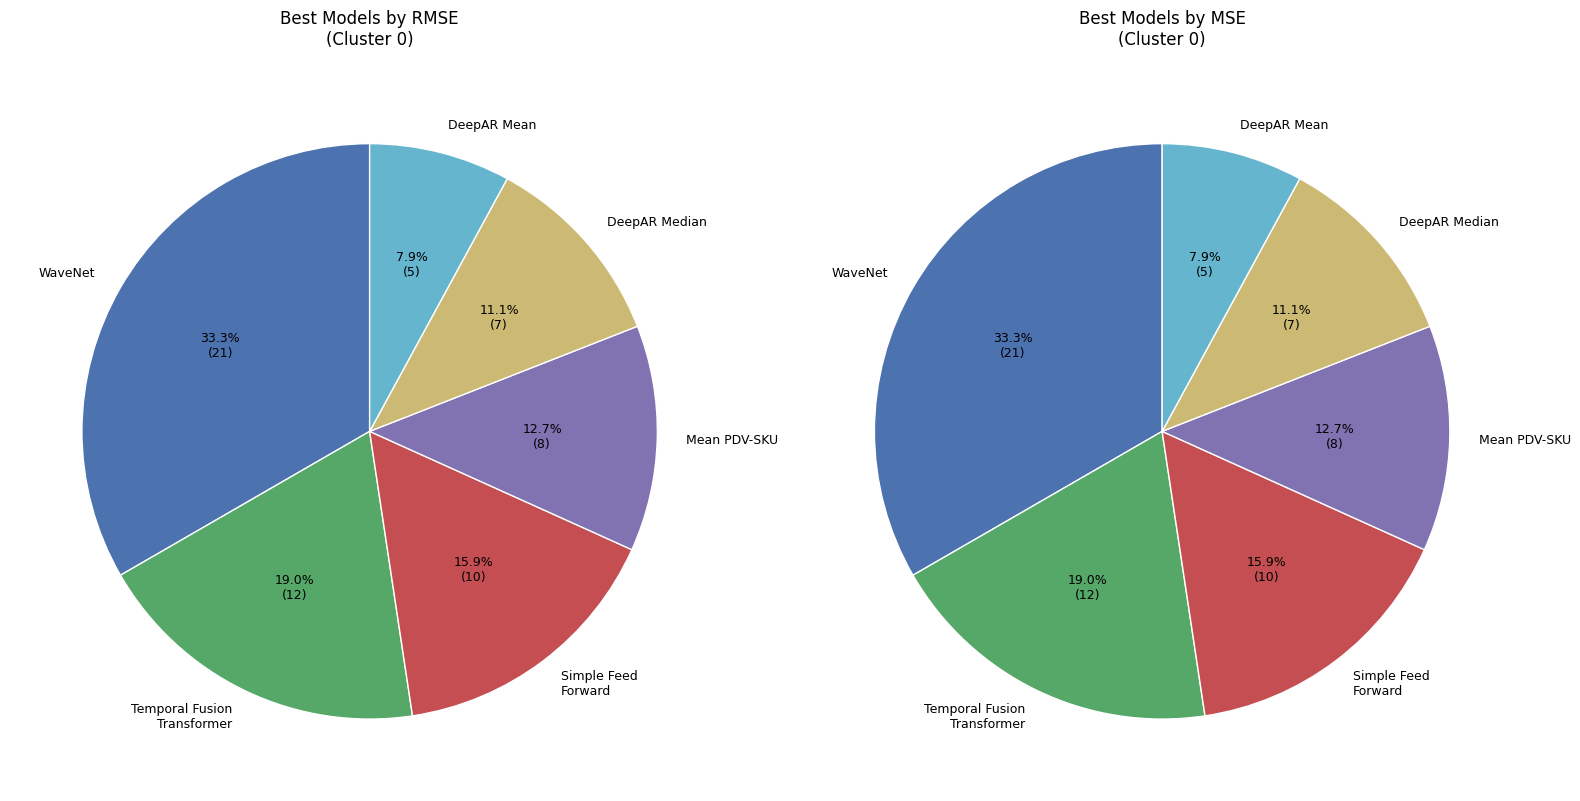


Cluster 0 - Best RMSE counts (original names):
best_rmse
rmse_cant_vta_pred_wavenet_mean     21
rmse_cant_vta_pred_tft_mean         12
rmse_cant_vta_pred_sff_mean         10
rmse_cant_vta_pred_mean_pdv_sku      8
rmse_cant_vta_pred_deepar_median     7
rmse_cant_vta_pred_deepar_mean       5

Cluster 0 - Best MSE counts (original names):
best_mse
mse_cant_vta_pred_wavenet_mean     21
mse_cant_vta_pred_tft_mean         12
mse_cant_vta_pred_sff_mean         10
mse_cant_vta_pred_mean_pdv_sku      8
mse_cant_vta_pred_deepar_median     7
mse_cant_vta_pred_deepar_mean       5


In [162]:
plot_best_model_pies(0)